# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*2 - Feature Selection & Modeling*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br>

2. [Feature Selection](#2.-Feature-Selection) <br>

3. [Model Training](#3.-Model-Training) <br>


In [1]:
## CELL TYPES (remover depois)

<div class="alert-danger">
    
test

<div class="alert-warning">
    
test

<div class="alert-info">
    
test

# 1. Import Libraries & Data

In [1]:
import os
import pandas as pd
import json

# Models
import xgboost as xgb
import lightgbm as lgb

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")


# External Files
import fs_modelling as fs
import utils as u

**Data**

In [2]:
X_train = pd.read_csv('./data/X_train_data/X_train.csv', index_col = 'Unnamed: 0')
X_val = pd.read_csv('./data/X_val_data/X_val.csv', index_col = 'Unnamed: 0')

def import_all_csvs(folder):
    """Imports all CSV files from a given folder and tracks variable names."""
    var_list = []

    for file in os.listdir(folder):
        if file.endswith('.csv'):
            df_name = file.replace('.csv', '')
            df = pd.read_csv(os.path.join(folder, file), index_col='Unnamed: 0')
            globals()[df_name] = df  # Save as a global variable
            var_list.append(df_name)  # Track variable name
    
    return var_list

# Import each CSV file as individual DataFrames
y_train_list = import_all_csvs('data/y_train_data')
y_val_list = import_all_csvs('data/y_val_data')

**Scaling**

In [3]:
X_train_scaled, X_val_scaled = fs.scale_data(X_train, 
                                          X_val, 
                                          scaler_type='minmax')

# 2. Feature Selection

In [7]:
selected_features = {}

for y_train_name in y_train_list:
    y_train = globals()[y_train_name]

    selected_features[y_train_name] = fs.feature_selection(
        X_train_scaled, 
        y_train, 
        method='all', # all but LASSO because it was mostly selecting 0 features
        rfe_model=xgb.XGBRegressor(verbose = -1), # use fo lgbm verbose = -1
        mi_threshold = 0.05,
        plot=False
    )
    
    print('\n Next Feature... \n')

# Save
with open("utils.py", "a") as f:
    f.write(f"\n\nfs_mm_xgb2 = {repr(selected_features)}")


Selected 143 features by correlation
Selected 114 features by RFECV
Selected 87 features by importance with threshold 0.0021551724137931034
Selected 130 features by Mutual Information
Selected 13 features that intersect across all methods

 Next Feature... 

Selected 143 features by correlation
Selected 111 features by RFECV
Selected 91 features by importance with threshold 0.0021551724137931034
Selected 282 features by Mutual Information
Selected 10 features that intersect across all methods

 Next Feature... 

Selected 143 features by correlation
Selected 100 features by RFECV
Selected 81 features by importance with threshold 0.0021551724137931034
Selected 193 features by Mutual Information
Selected 12 features that intersect across all methods

 Next Feature... 

Selected 143 features by correlation
Selected 103 features by RFECV
Selected 85 features by importance with threshold 0.0021551724137931034
Selected 43 features by Mutual Information
Selected 12 features that intersect acro

In [10]:
selected_features

{'y_train_36': ['CC_UK_Lag_12_RollingMean3',
  '#12_Lag_3',
  '#14_Lag_1',
  '#12_Lag_1_RollingMean6',
  '#9_Lag_12',
  '#1_Lag_1_RollingMean3',
  'stock_volume_Lag_12',
  'GER Production Index_Lag_12',
  '#36_Lag_12',
  '#8_Lag_3',
  '#16_Lag_1_RollingMean3',
  'GER EE Production Index_Lag_12_RollingMean3',
  '#13_Lag_1'],
 'y_train_8': ['CHI Production Index_Lag_12',
  'USA EE Producer Prices_Lag_12_RollingMean3',
  'FRA EE Producer Prices_Lag_12_RollingMean3',
  '#6_Lag_1_RollingMean3',
  '#13_Lag_3_RollingMean6',
  '#16_Lag_3',
  'Clean_Ita_Lag_12',
  '#16_Lag_1_RollingMean3',
  '#11_Lag_1',
  '#12_Lag_12'],
 'y_train_20': ['#16_Lag_3_RollingMean6',
  '#14_Lag_1_RollingMean6',
  '#6_Lag_1_RollingMean3',
  '#5_Lag_1',
  '#9_Lag_12',
  '#1_Lag_1_RollingMean6',
  '#16_Lag_1',
  'Year',
  'Fossil_US_Lag_12_RollingMean3',
  'Fossil_Chi_Lag_12_RollingMean6',
  '#12_Lag_1_RollingMean3',
  '#3_Lag_1'],
 'y_train_9': ['#1_Lag_1',
  'CHI Production Index_Lag_12',
  '#20_Lag_1',
  'CC_UK_Lag_

**Final Features**

In [11]:
features = u.fs_mm_xgb2
features

{'y_train_36': ['CC_UK_Lag_12_RollingMean3',
  '#12_Lag_3',
  '#14_Lag_1',
  '#12_Lag_1_RollingMean6',
  '#9_Lag_12',
  '#1_Lag_1_RollingMean3',
  'stock_volume_Lag_12',
  'GER Production Index_Lag_12',
  '#36_Lag_12',
  '#8_Lag_3',
  '#16_Lag_1_RollingMean3',
  'GER EE Production Index_Lag_12_RollingMean3',
  '#13_Lag_1'],
 'y_train_8': ['CHI Production Index_Lag_12',
  'USA EE Producer Prices_Lag_12_RollingMean3',
  'FRA EE Producer Prices_Lag_12_RollingMean3',
  '#6_Lag_1_RollingMean3',
  '#13_Lag_3_RollingMean6',
  '#16_Lag_3',
  'Clean_Ita_Lag_12',
  '#16_Lag_1_RollingMean3',
  '#11_Lag_1',
  '#12_Lag_12'],
 'y_train_20': ['#16_Lag_3_RollingMean6',
  '#14_Lag_1_RollingMean6',
  '#6_Lag_1_RollingMean3',
  '#5_Lag_1',
  '#9_Lag_12',
  '#1_Lag_1_RollingMean6',
  '#16_Lag_1',
  'Year',
  'Fossil_US_Lag_12_RollingMean3',
  'Fossil_Chi_Lag_12_RollingMean6',
  '#12_Lag_1_RollingMean3',
  '#3_Lag_1'],
 'y_train_9': ['#1_Lag_1',
  'CHI Production Index_Lag_12',
  '#20_Lag_1',
  'CC_UK_Lag_

# 3. Model Training

### ARIMA


 Training model for Product Category 36


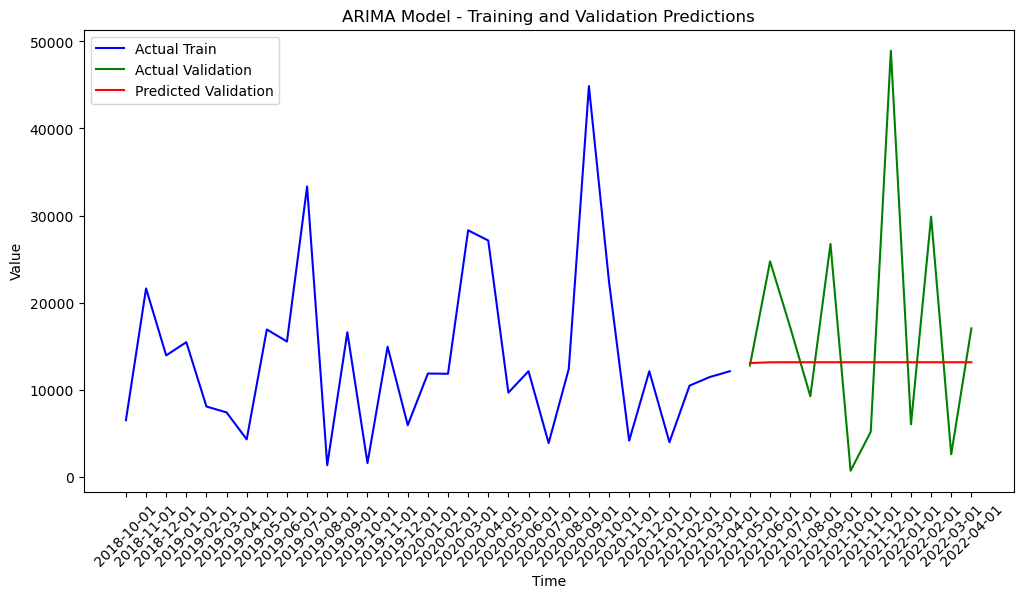

Results appended to ./modelling_csvs/36_results.csv

 Training model for Product Category 8


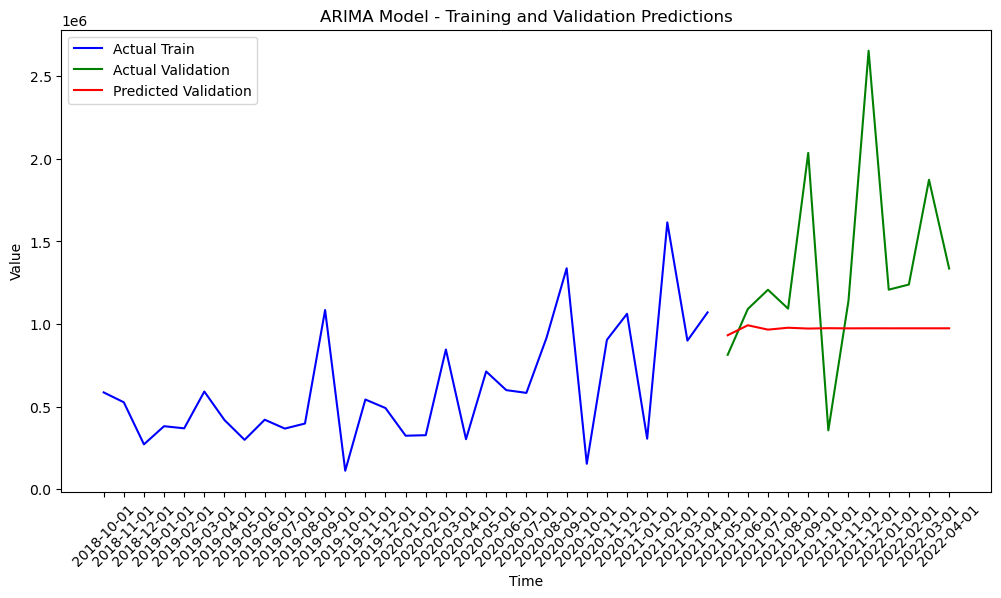

Results appended to ./modelling_csvs/8_results.csv

 Training model for Product Category 20


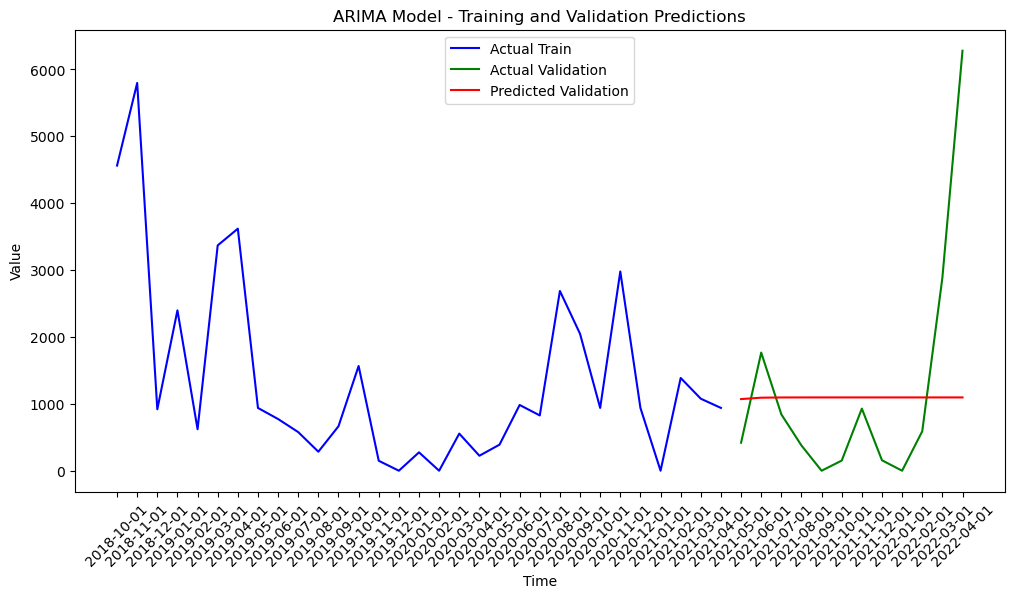

Results appended to ./modelling_csvs/20_results.csv

 Training model for Product Category 9


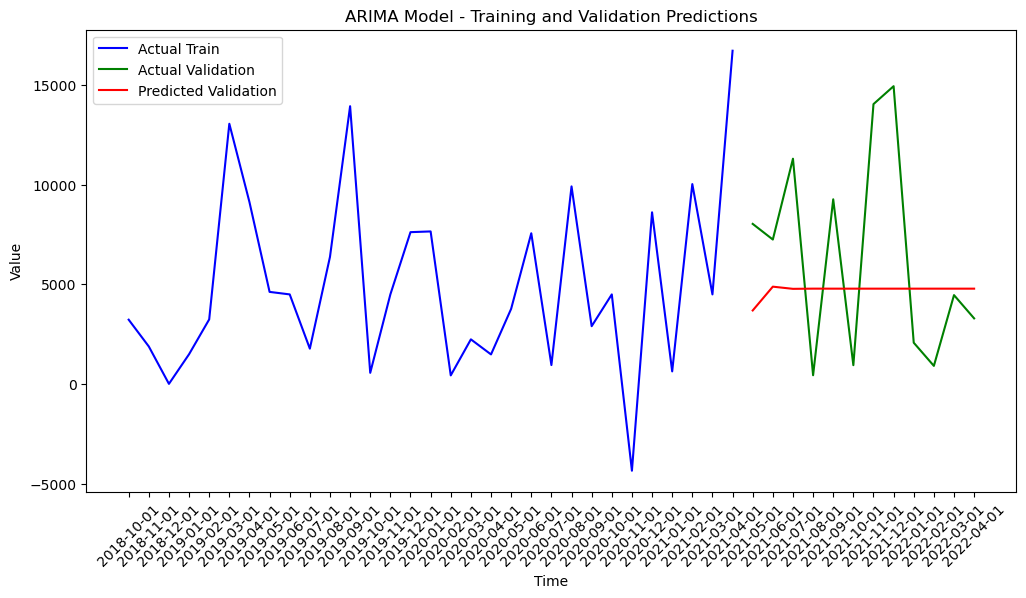

Results appended to ./modelling_csvs/9_results.csv

 Training model for Product Category 4


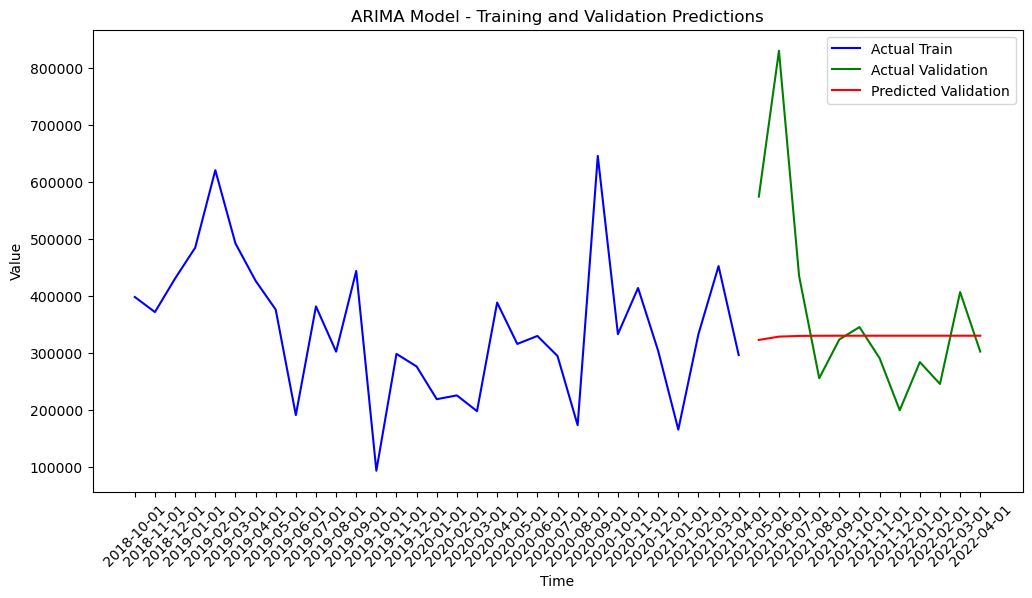

Results appended to ./modelling_csvs/4_results.csv

 Training model for Product Category 11


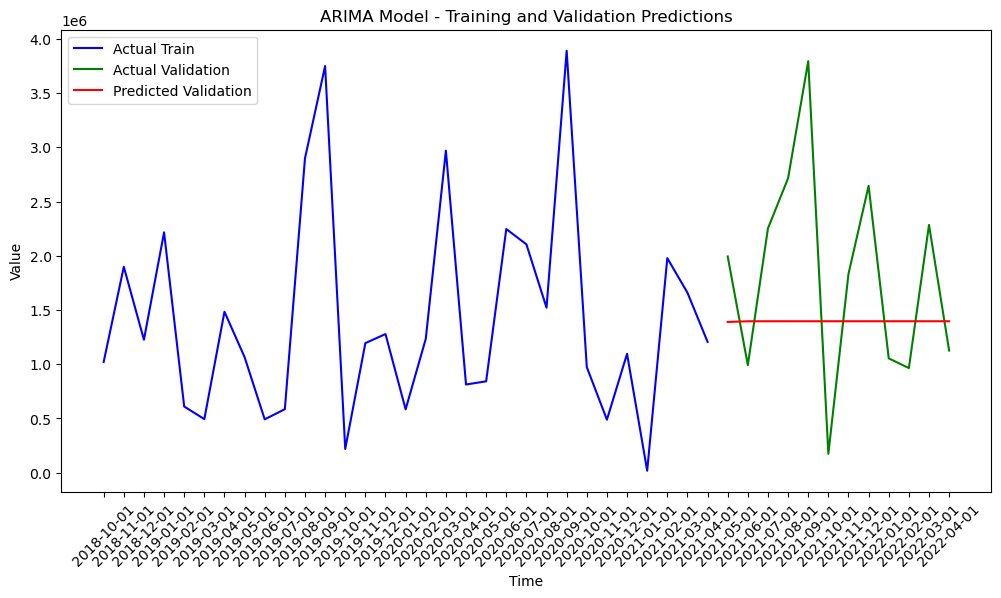

Results appended to ./modelling_csvs/11_results.csv

 Training model for Product Category 5


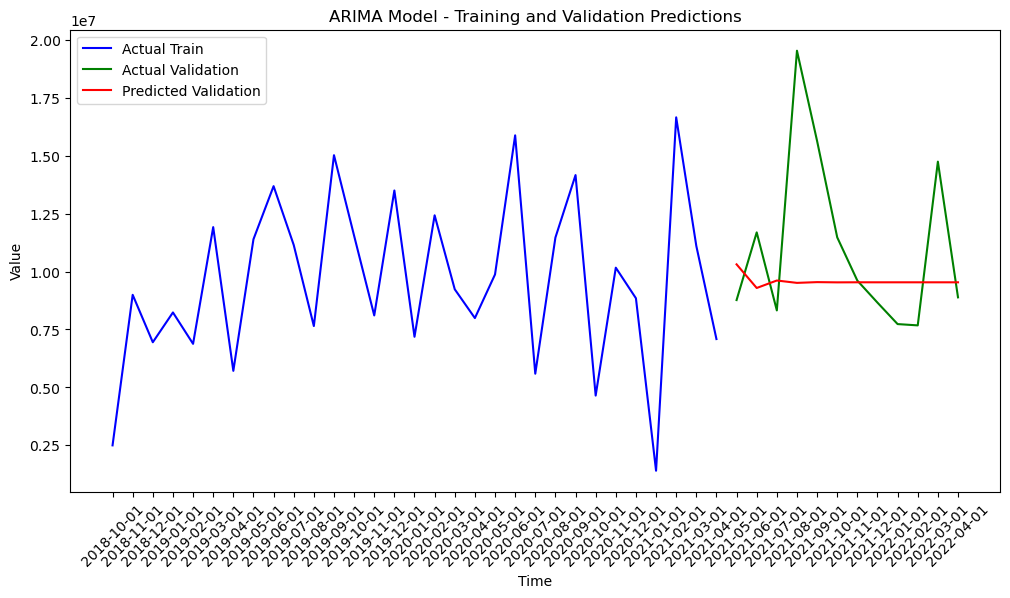

Results appended to ./modelling_csvs/5_results.csv

 Training model for Product Category 12


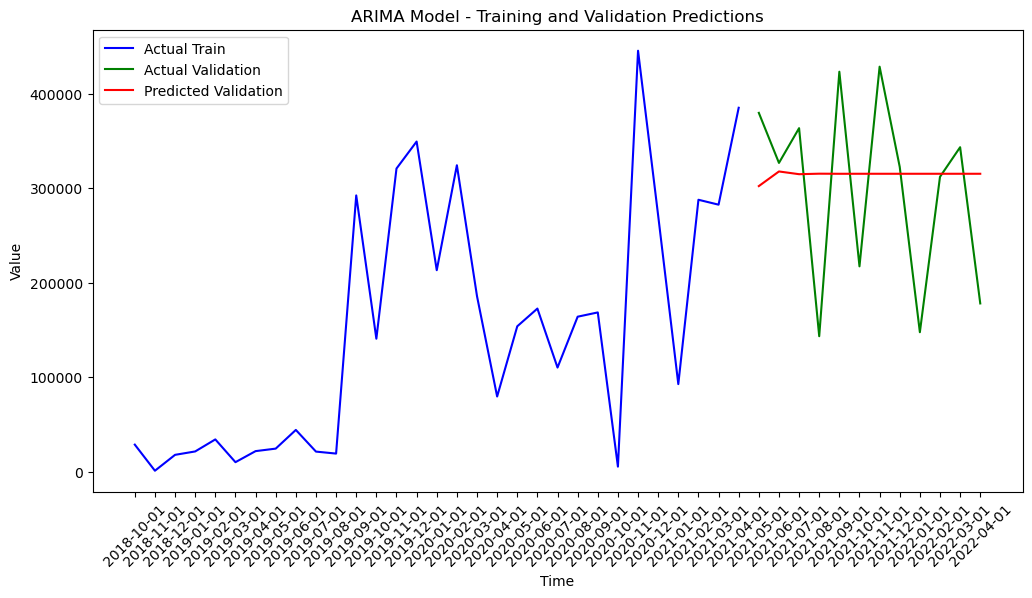

Results appended to ./modelling_csvs/12_results.csv

 Training model for Product Category 13


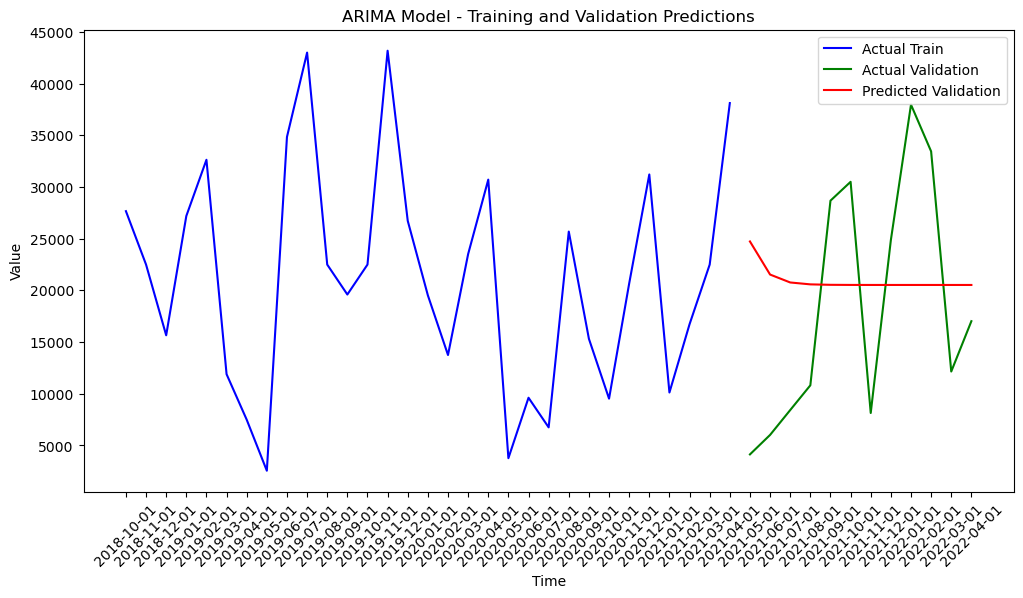

Results appended to ./modelling_csvs/13_results.csv

 Training model for Product Category 6


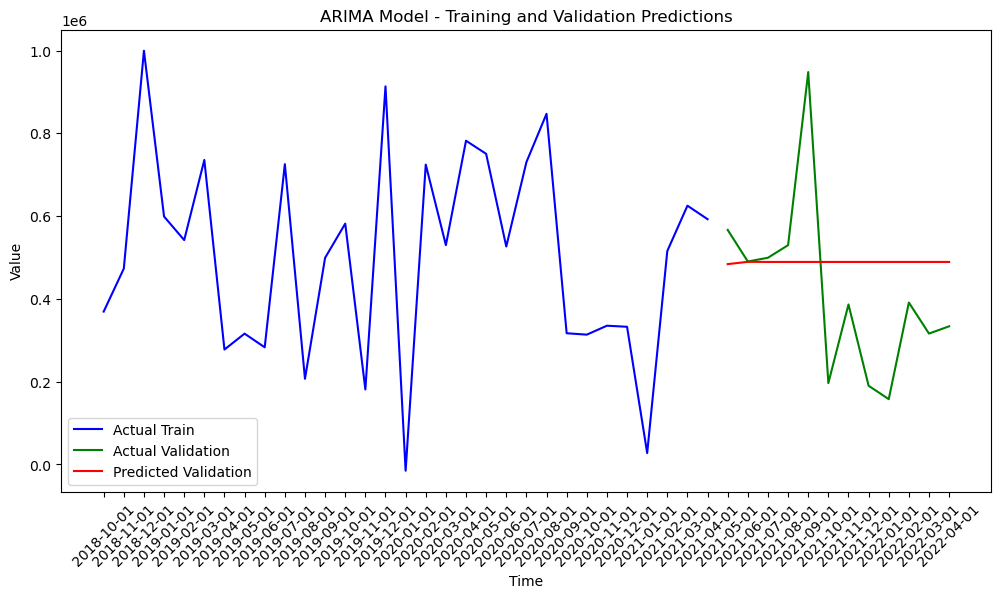

Results appended to ./modelling_csvs/6_results.csv

 Training model for Product Category 16


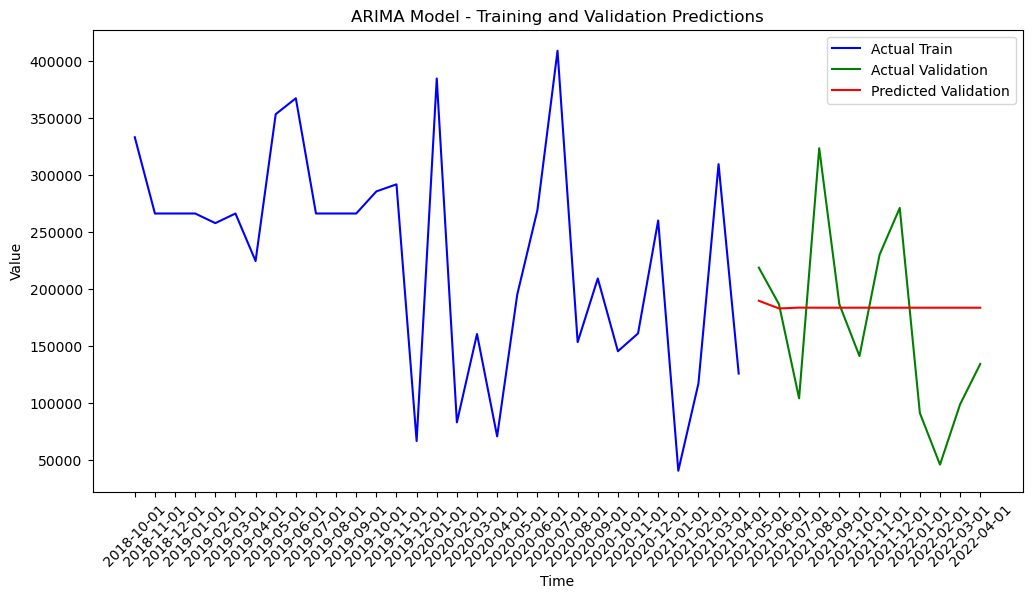

Results appended to ./modelling_csvs/16_results.csv

 Training model for Product Category 3


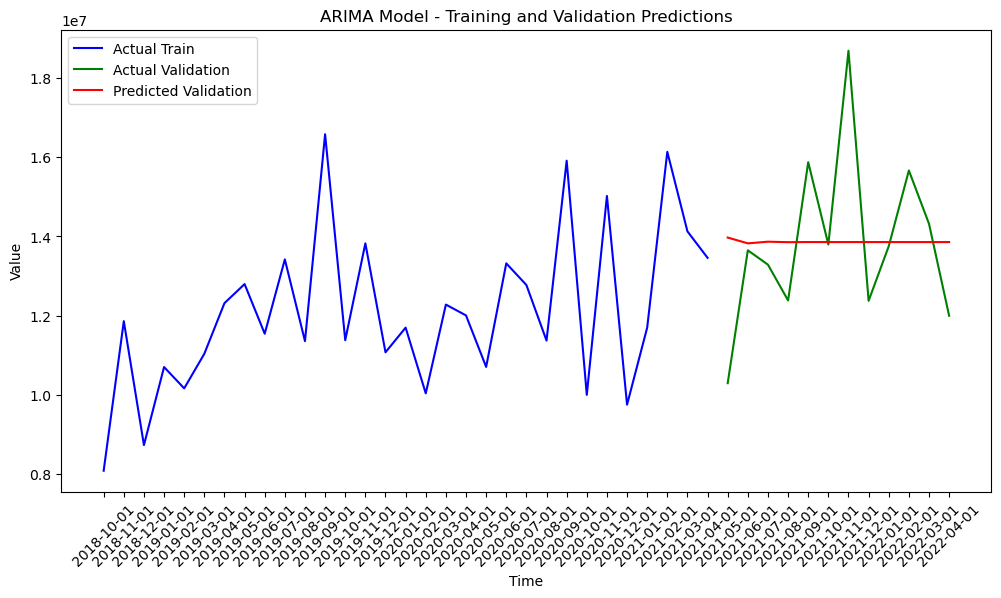

Results appended to ./modelling_csvs/3_results.csv

 Training model for Product Category 1


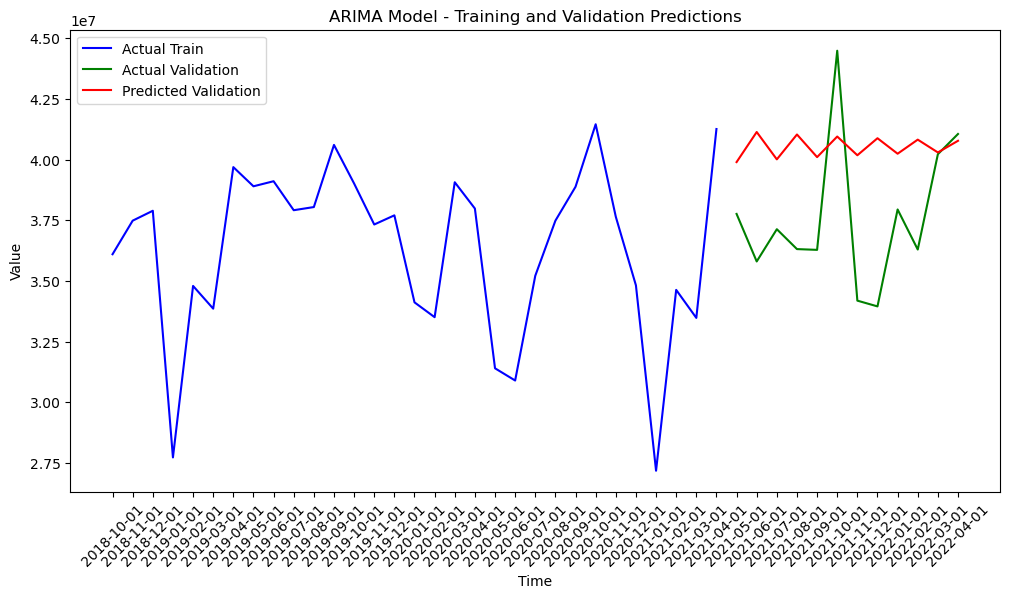

Results appended to ./modelling_csvs/1_results.csv

 Training model for Product Category 14


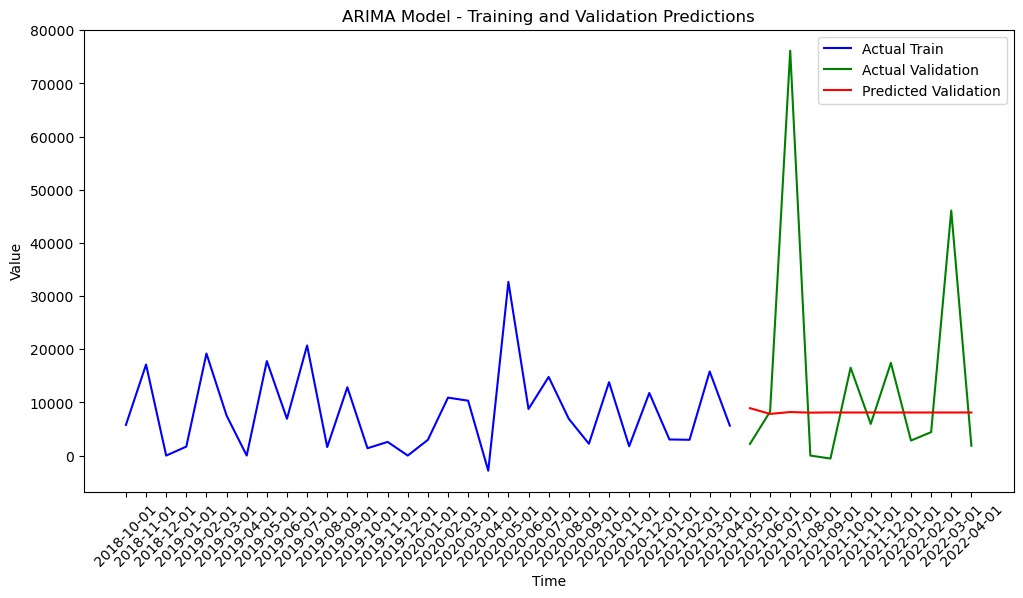

Results appended to ./modelling_csvs/14_results.csv


In [12]:
# Empty dicts
model_fits = {}
val_preds = {}
model_summaries = {}

# ARIMA for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Fit the ARIMA model using fs.stats_models method
    model_fits[target_number], val_preds[target_number], model_summaries[target_number] = fs.stats_models(
        'arima', X_train_scaled, X_val_scaled, 
        target_train, target_val, order=(1, 1, 1),
        plot=True,
        csv_path=f'./modelling_csvs/{target_number}_results.csv'
    )

In [22]:
#model_fit_ar, val_preds_ar, model_summary_ar = fs.stats_models('arima', X_train_scaled, X_val_scaled, 
#                                     y_train_1, y_val_1, order=(1,1,3),
#                                     plot = False, 
#                                     csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [16]:
steps_ahead = 30  # Number of future steps you want to predict
future_preds = model_fits['36'].forecast(steps=steps_ahead)
print(future_preds)


2021-05-01     1923.405189
2021-06-01    54188.938431
2021-07-01    43331.492644
2021-08-01    45586.977697
2021-09-01    45118.431694
2021-10-01    45215.765683
2021-11-01    45195.545885
2021-12-01    45199.746270
2022-01-01    45198.873698
2022-02-01    45199.054963
2022-03-01    45199.017308
2022-04-01    45199.025130
2022-05-01    45199.023505
2022-06-01    45199.023843
2022-07-01    45199.023772
2022-08-01    45199.023787
2022-09-01    45199.023784
2022-10-01    45199.023785
2022-11-01    45199.023785
2022-12-01    45199.023785
2023-01-01    45199.023785
2023-02-01    45199.023785
2023-03-01    45199.023785
2023-04-01    45199.023785
2023-05-01    45199.023785
2023-06-01    45199.023785
2023-07-01    45199.023785
2023-08-01    45199.023785
2023-09-01    45199.023785
2023-10-01    45199.023785
Freq: MS, Name: predicted_mean, dtype: float64


### SARIMAX


 Training model for Product Category 36


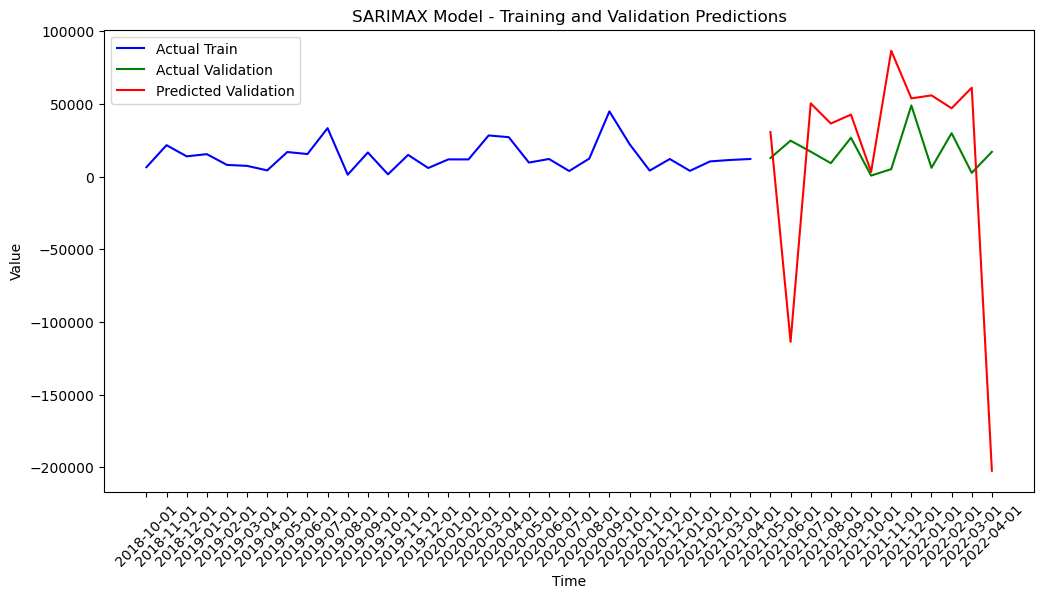

Results appended to ./modelling_csvs/36_results.csv

 Training model for Product Category 8


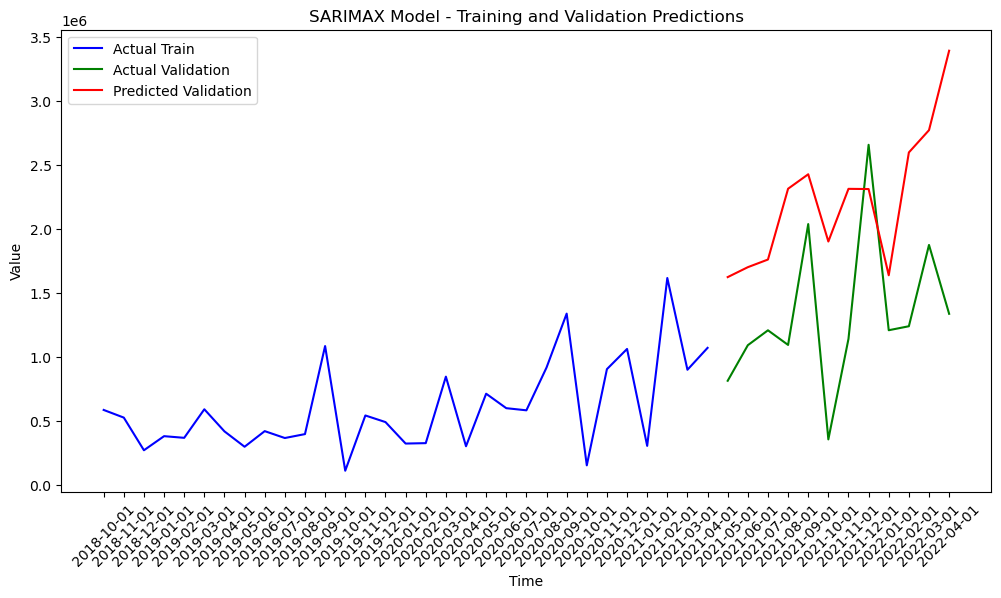

Results appended to ./modelling_csvs/8_results.csv

 Training model for Product Category 20


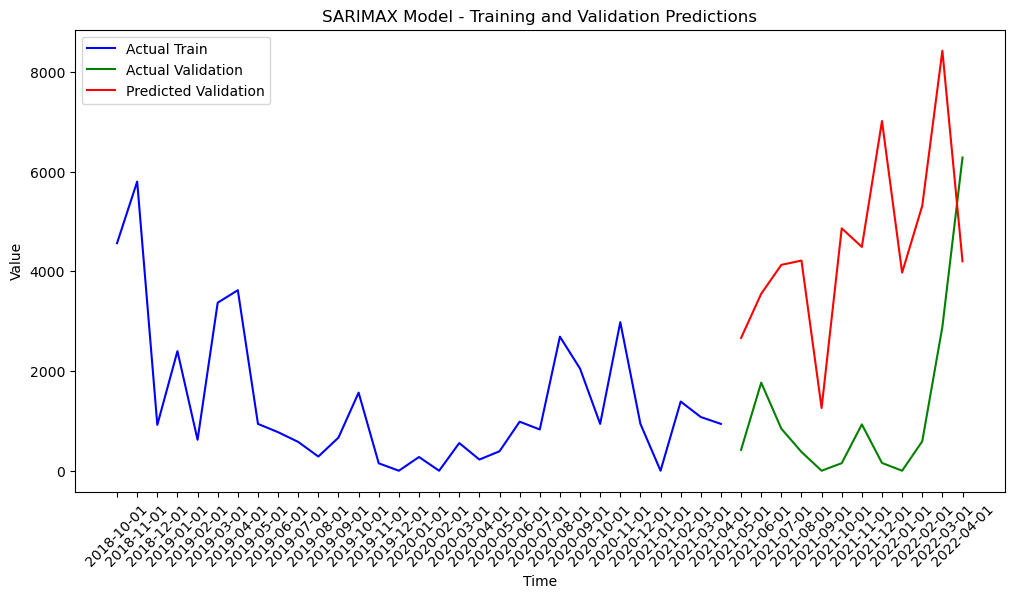

Results appended to ./modelling_csvs/20_results.csv

 Training model for Product Category 9


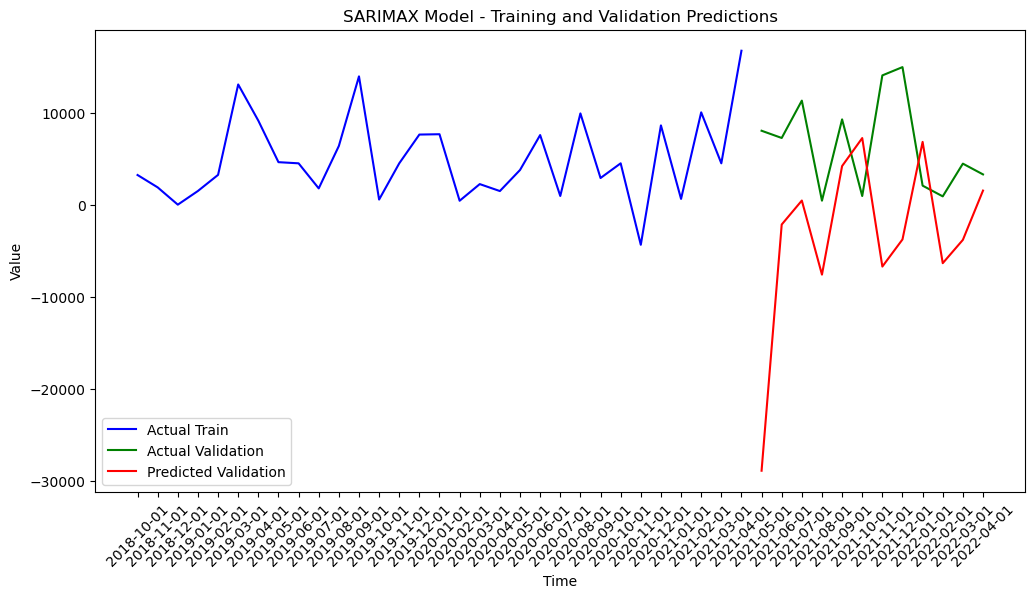

Results appended to ./modelling_csvs/9_results.csv

 Training model for Product Category 4


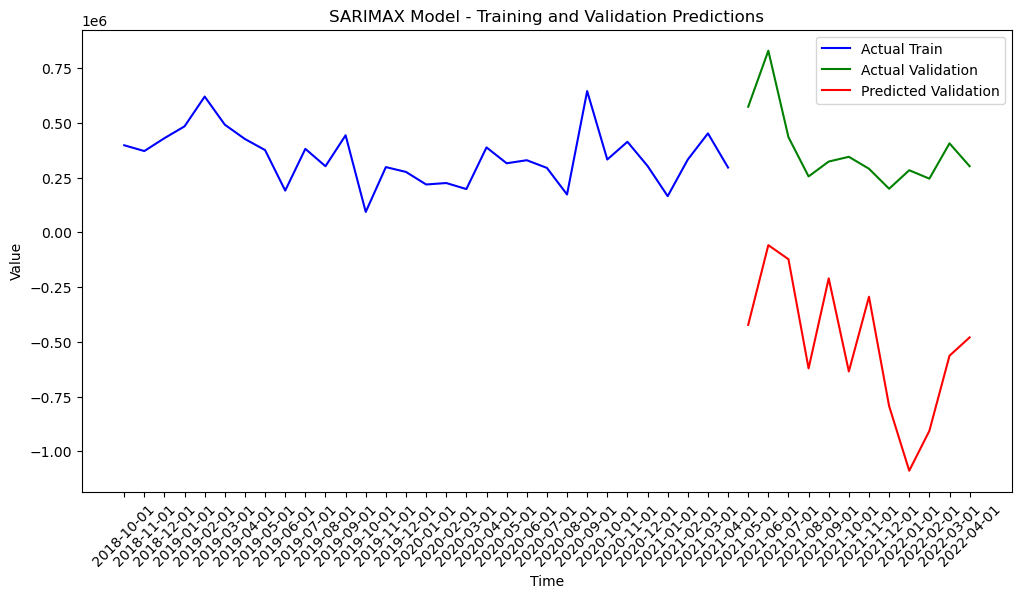

Results appended to ./modelling_csvs/4_results.csv

 Training model for Product Category 11


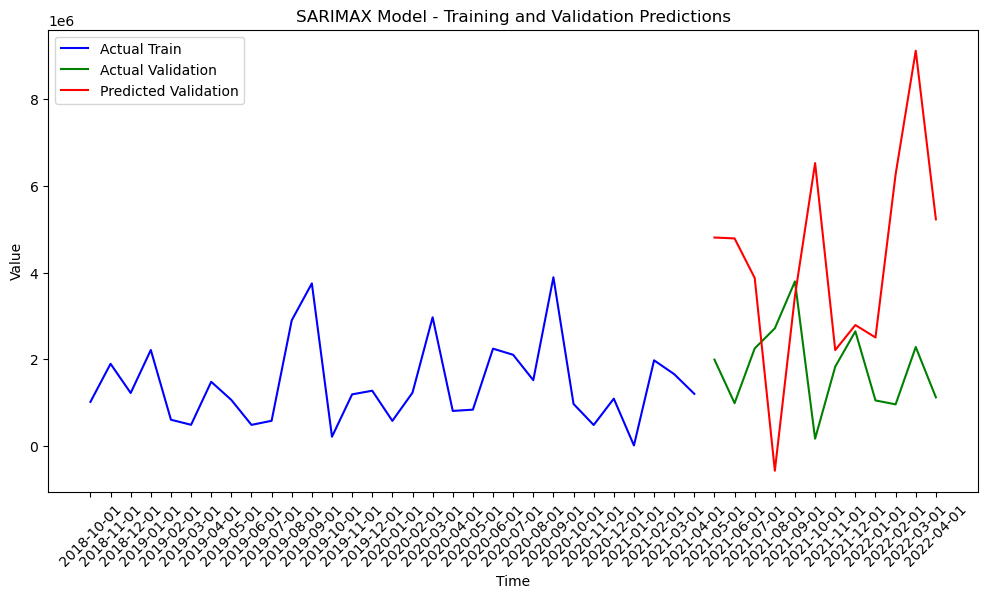

Results appended to ./modelling_csvs/11_results.csv

 Training model for Product Category 5


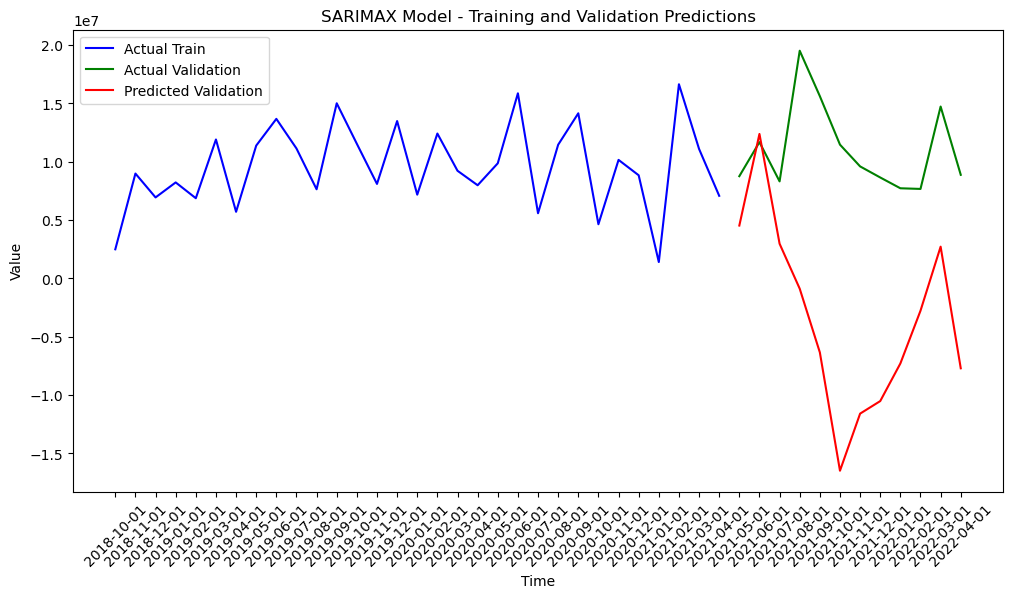

Results appended to ./modelling_csvs/5_results.csv

 Training model for Product Category 12


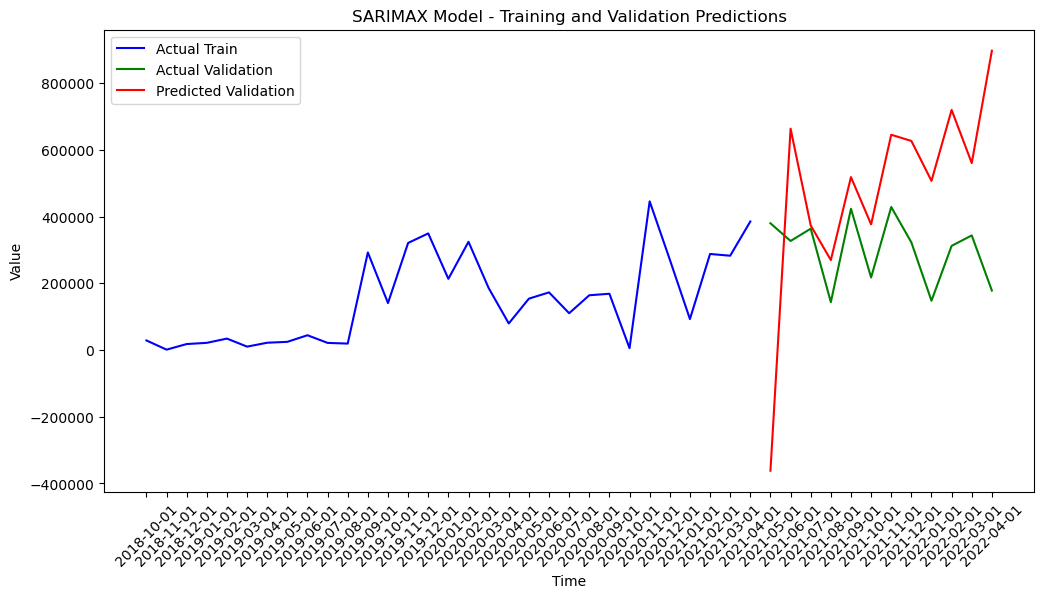

Results appended to ./modelling_csvs/12_results.csv

 Training model for Product Category 13


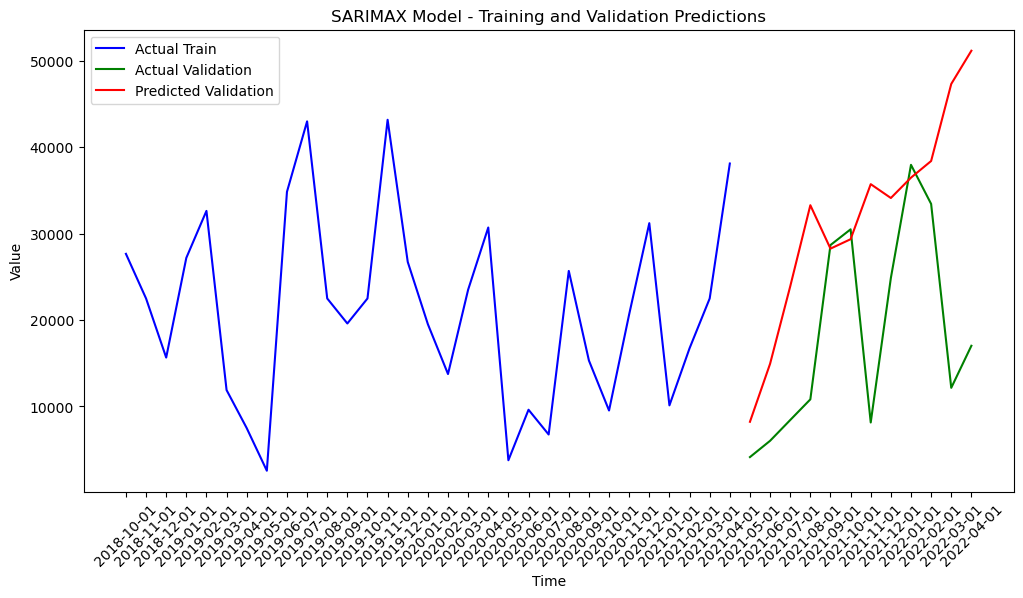

Results appended to ./modelling_csvs/13_results.csv

 Training model for Product Category 6


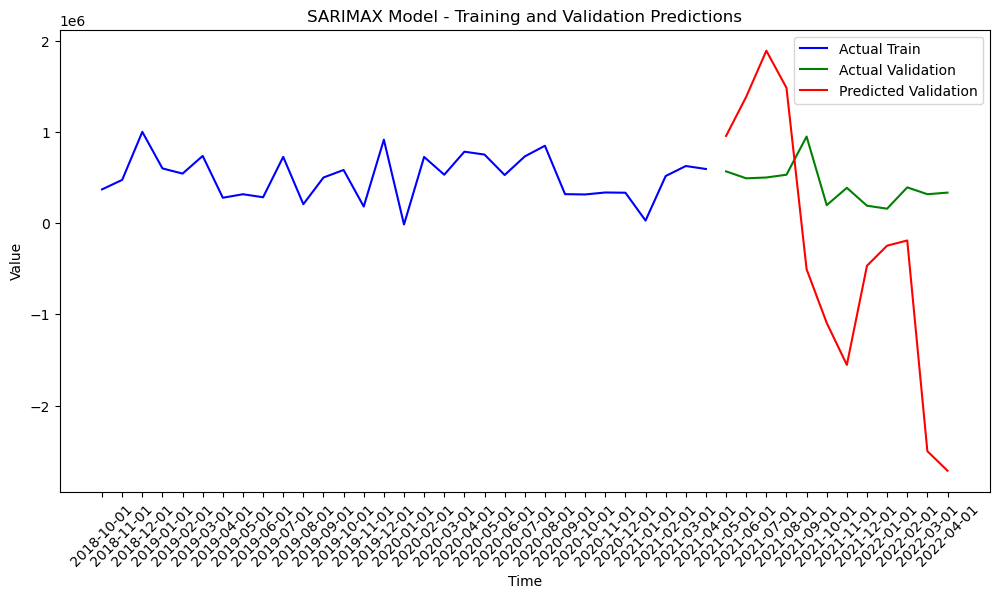

Results appended to ./modelling_csvs/6_results.csv

 Training model for Product Category 16


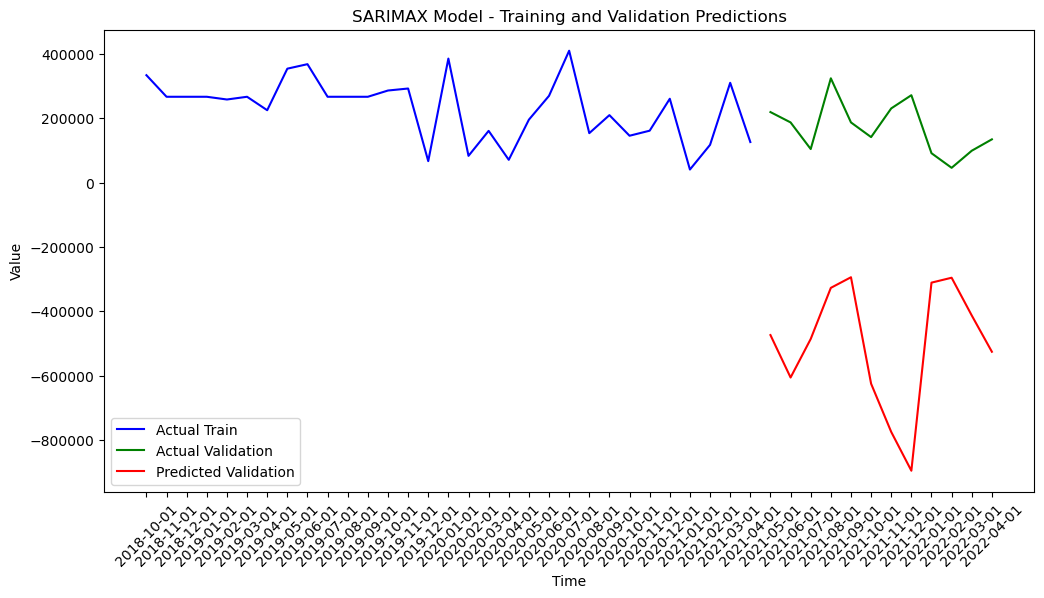

Results appended to ./modelling_csvs/16_results.csv

 Training model for Product Category 3


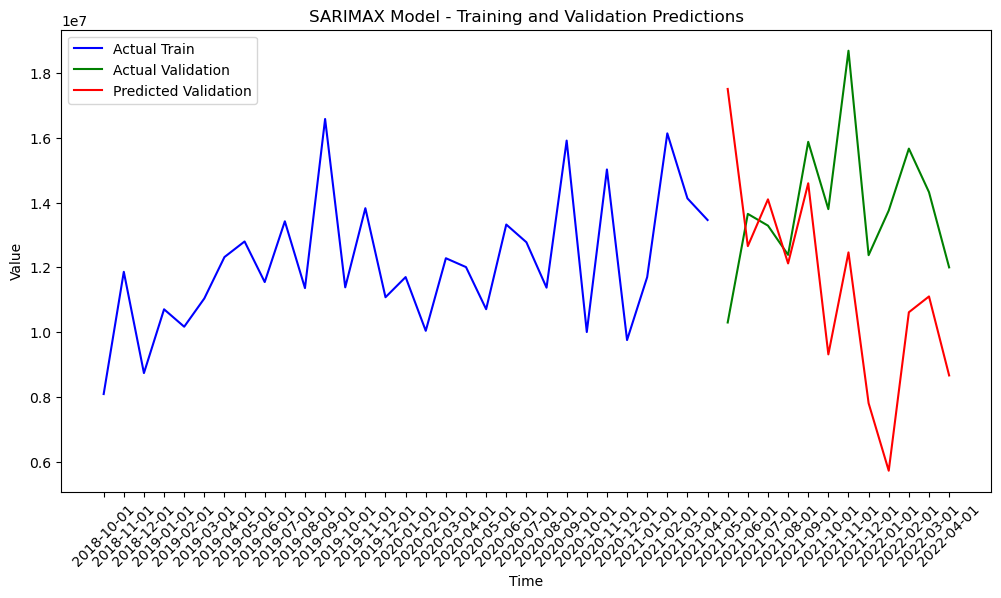

Results appended to ./modelling_csvs/3_results.csv

 Training model for Product Category 1


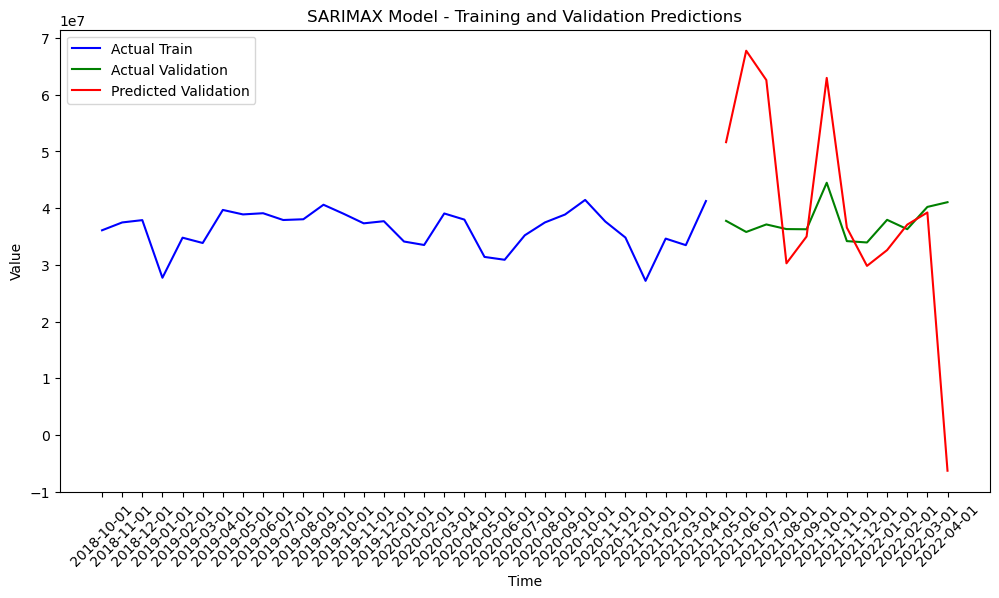

Results appended to ./modelling_csvs/1_results.csv

 Training model for Product Category 14


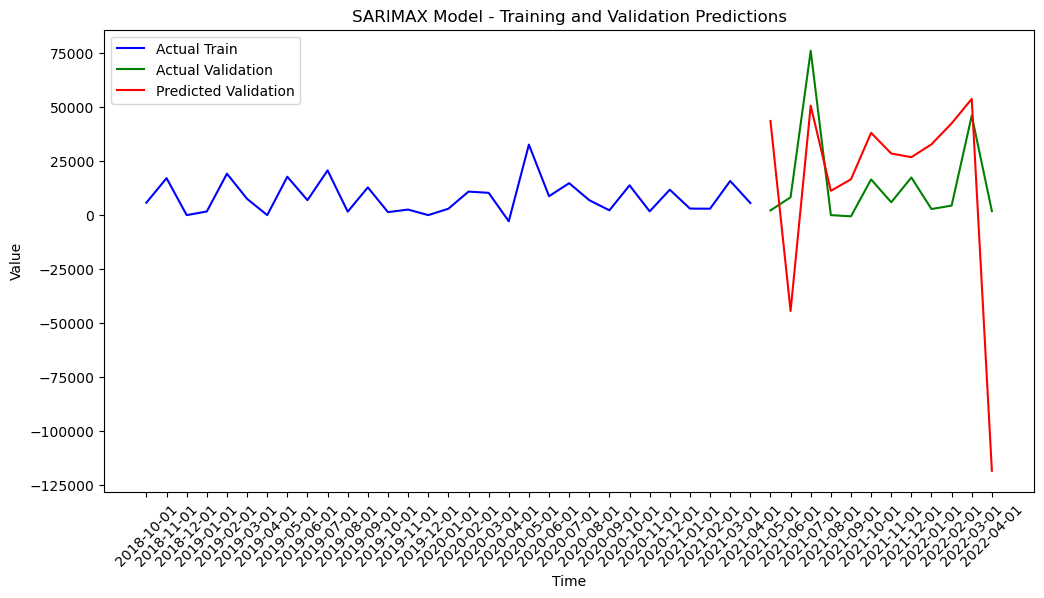

Results appended to ./modelling_csvs/14_results.csv


In [13]:
# Empty dicts
model_fits_sarx = {}
val_preds_sarx = {}
model_summaries_sarx = {}

# SARIMAX for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')


    # Only selected features
    X_train_target = X_train_scaled[selected_features] 
    X_val_target = X_val_scaled[selected_features] 

    # Fit the SARIMAX model using fs.stats_models method
    model_fits_sarx[target_number], val_preds_sarx[target_number], model_summaries_sarx[target_number] = fs.stats_models(
        'sarimax', X_train_target, X_val_target, 
        target_train, target_val,
        plot=True,
        csv_path=f'./modelling_csvs/{target_number}_results.csv'
    )

In [37]:
#model_fit_sarx, val_preds_sarx, model_summary_sarx = fs.stats_models('sarimax', X_train, X_val, 
#                                     y_train_1, y_val_1, order=(1,1,3),
#                                     plot = False, 
#                                     csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [83]:
X_future = X_val # temp
future_preds = model_fit_sarx.forecast(steps=len(X_future), exog=X_future)
print(future_preds)


2021-05-01    3.951051e+07
2021-06-01    4.180620e+07
2021-07-01    4.068981e+07
2021-08-01    4.485621e+07
2021-09-01    4.369701e+07
2021-10-01    4.223861e+07
2021-11-01    3.961871e+07
2021-12-01    4.288582e+07
2022-01-01    3.167765e+07
2022-02-01    3.317506e+07
2022-03-01    3.887002e+07
2022-04-01    4.574127e+07
Freq: MS, Name: predicted_mean, dtype: float64


### Prophet

17:27:14 - cmdstanpy - INFO - Chain [1] start processing



 Training model for Product Category 36


17:27:15 - cmdstanpy - INFO - Chain [1] done processing


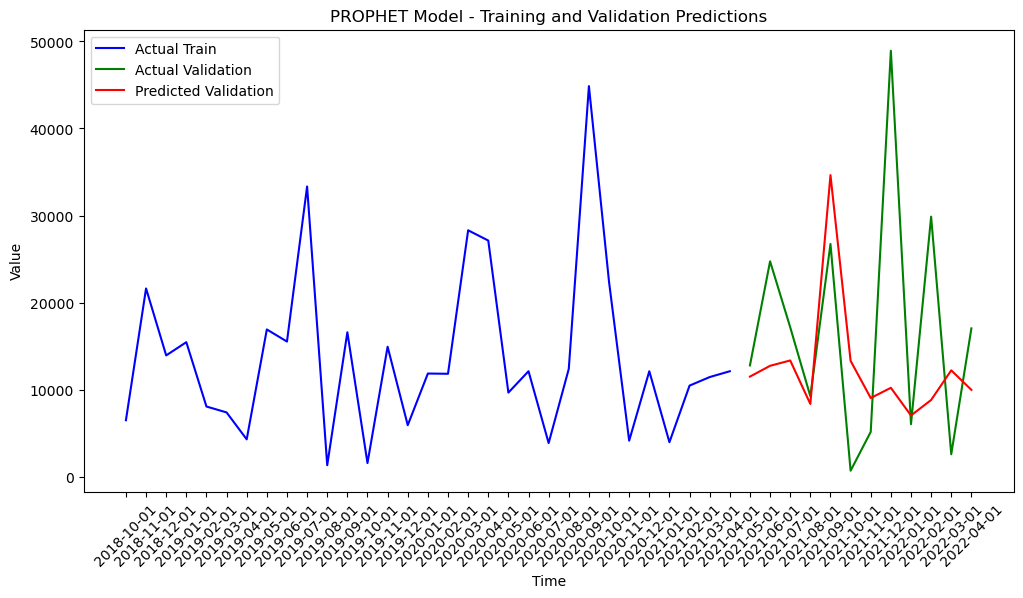

17:27:15 - cmdstanpy - INFO - Chain [1] start processing
17:27:15 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/36_results.csv

 Training model for Product Category 8


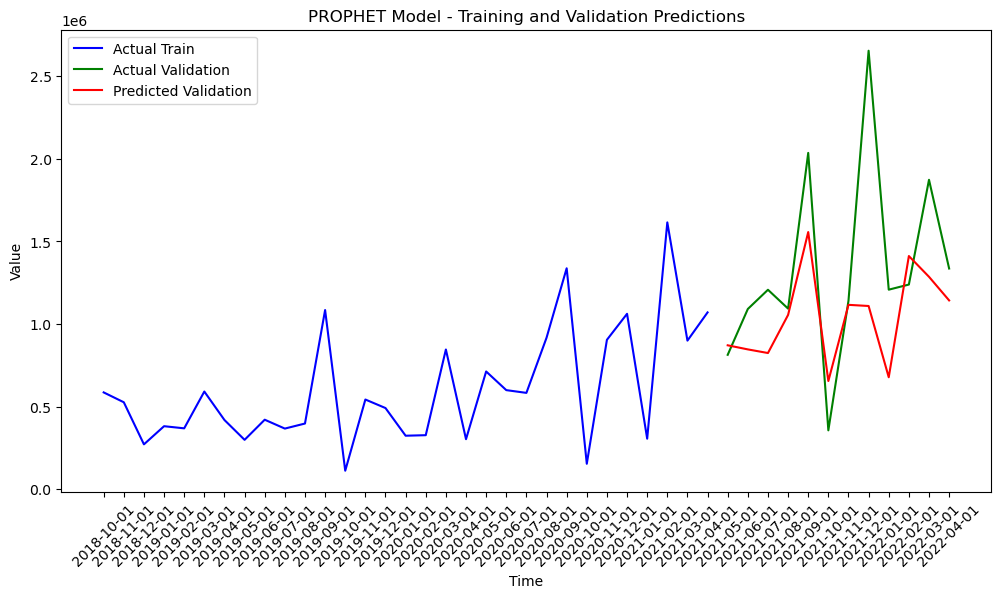

17:27:15 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./modelling_csvs/8_results.csv

 Training model for Product Category 20


17:27:15 - cmdstanpy - INFO - Chain [1] done processing


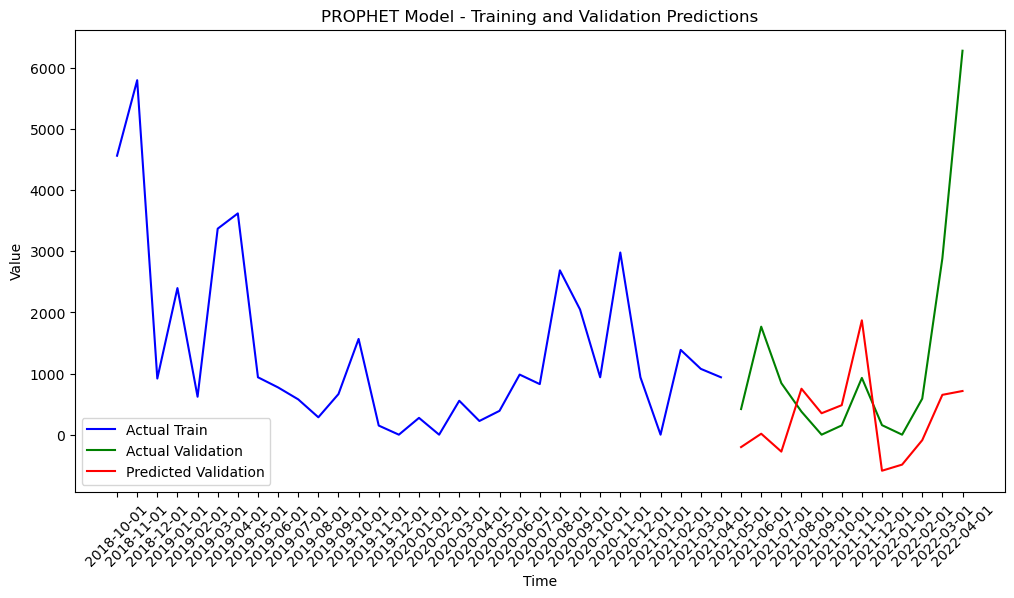

17:27:16 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./modelling_csvs/20_results.csv

 Training model for Product Category 9


17:27:16 - cmdstanpy - INFO - Chain [1] done processing


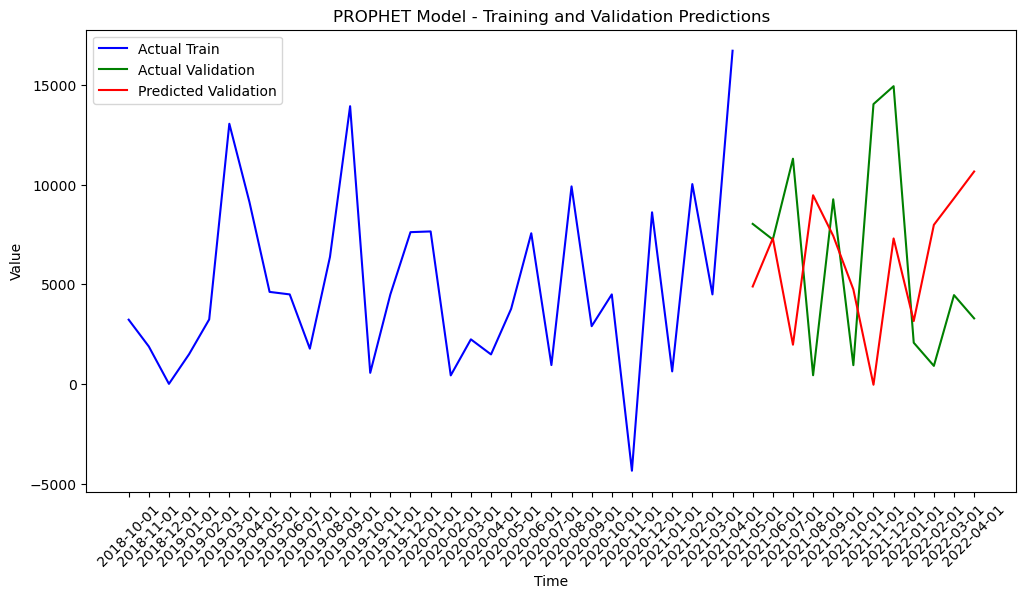

17:27:16 - cmdstanpy - INFO - Chain [1] start processing
17:27:16 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/9_results.csv

 Training model for Product Category 4


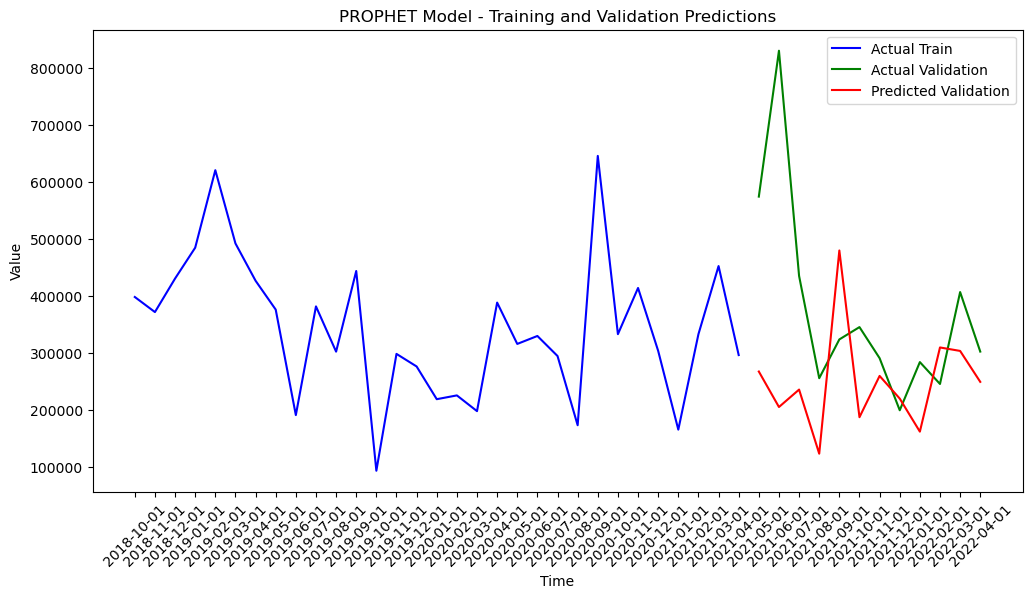

17:27:17 - cmdstanpy - INFO - Chain [1] start processing
17:27:17 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/4_results.csv

 Training model for Product Category 11


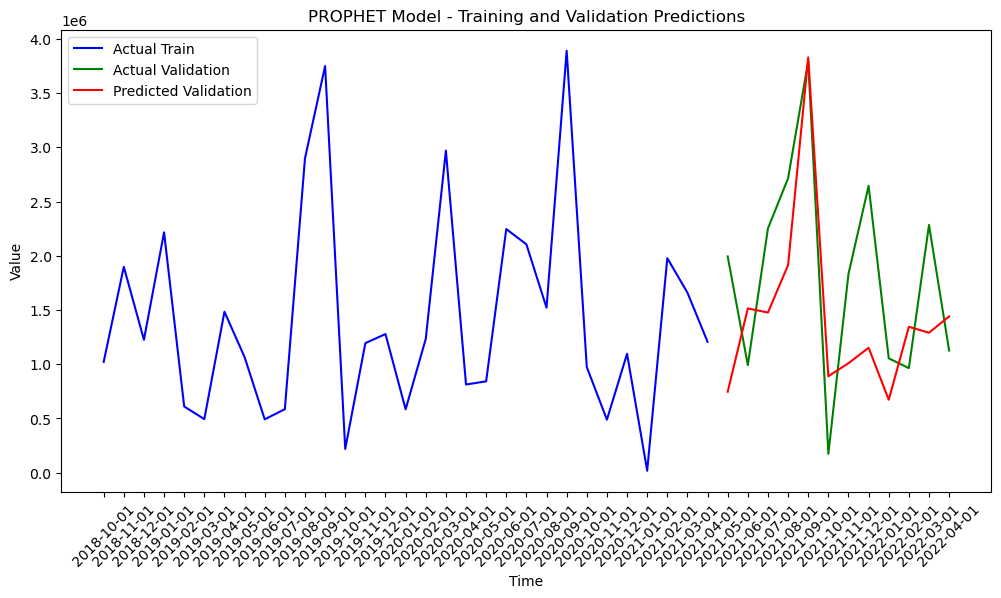

17:27:17 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./modelling_csvs/11_results.csv

 Training model for Product Category 5


17:27:17 - cmdstanpy - INFO - Chain [1] done processing


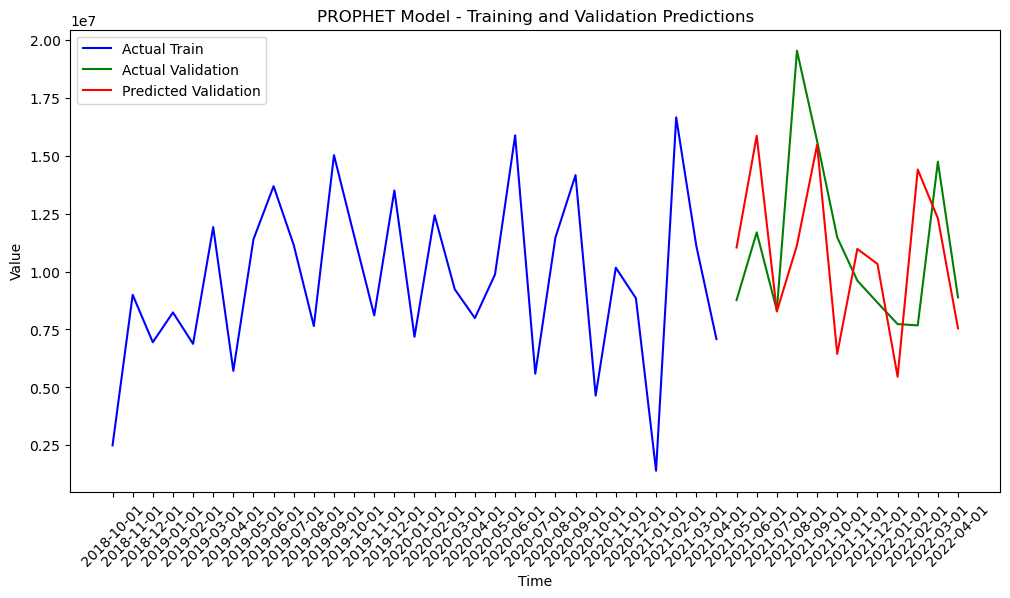

17:27:18 - cmdstanpy - INFO - Chain [1] start processing
17:27:18 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/5_results.csv

 Training model for Product Category 12


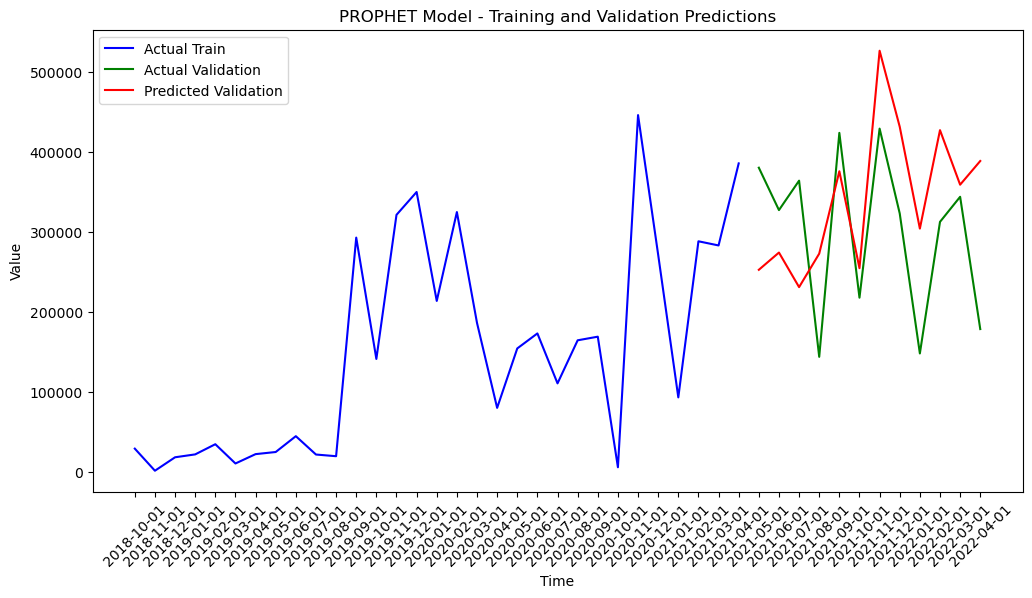

17:27:18 - cmdstanpy - INFO - Chain [1] start processing
17:27:18 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/12_results.csv

 Training model for Product Category 13


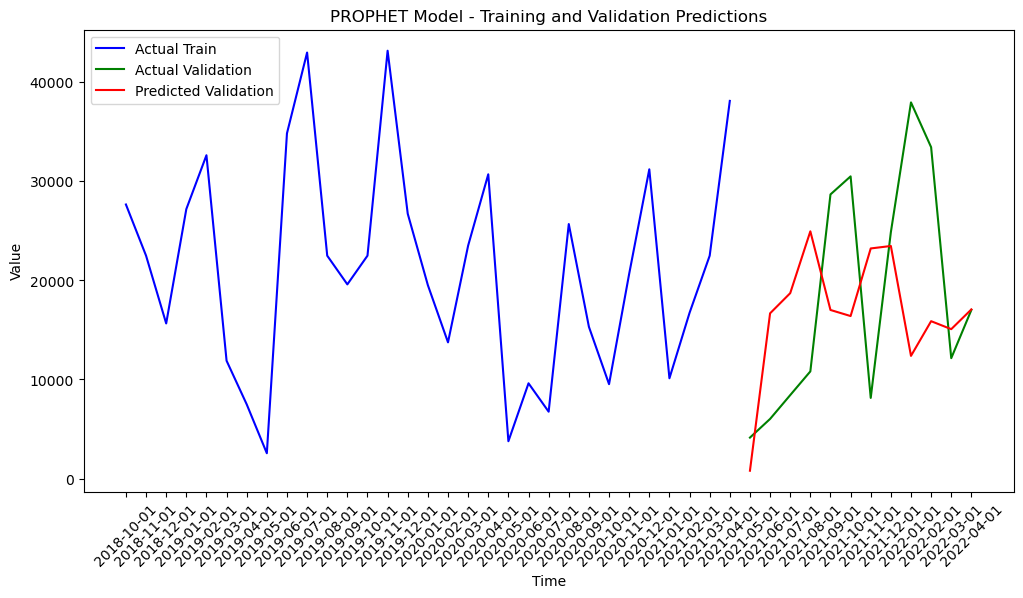

17:27:19 - cmdstanpy - INFO - Chain [1] start processing
17:27:19 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/13_results.csv

 Training model for Product Category 6


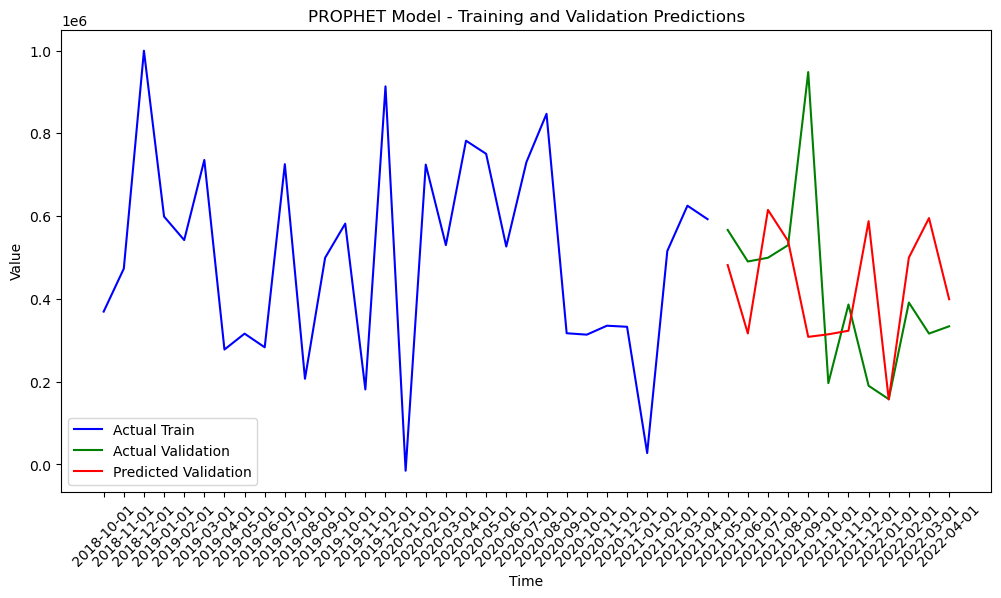

17:27:19 - cmdstanpy - INFO - Chain [1] start processing
17:27:19 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/6_results.csv

 Training model for Product Category 16


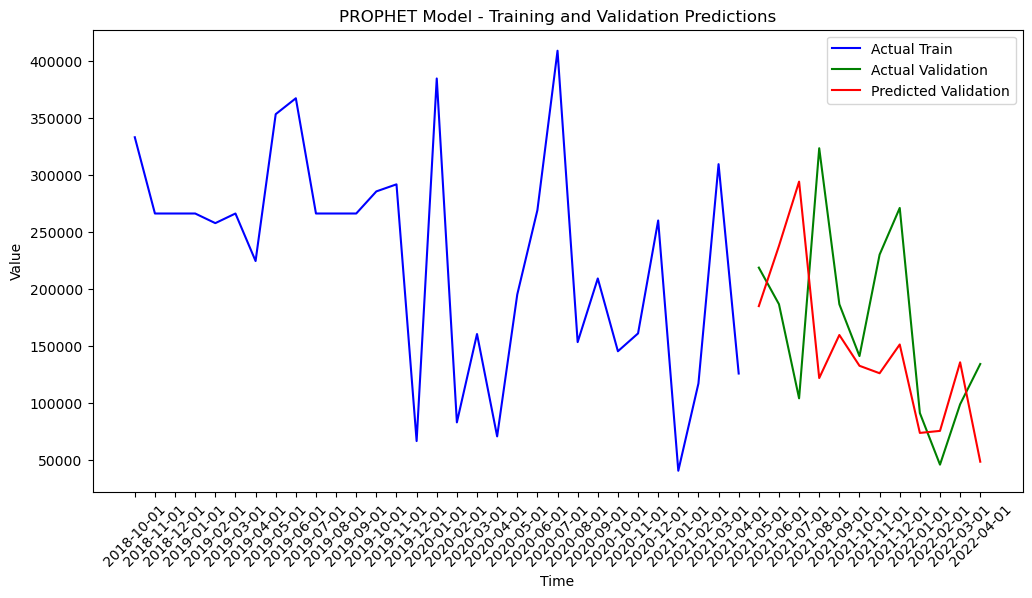

17:27:20 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./modelling_csvs/16_results.csv

 Training model for Product Category 3


17:27:20 - cmdstanpy - INFO - Chain [1] done processing


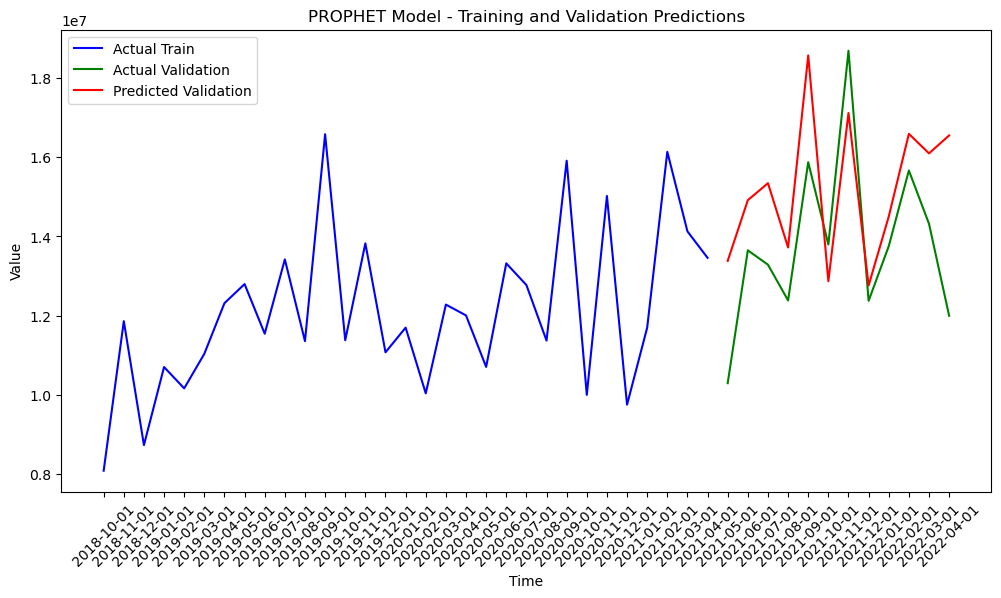

17:27:20 - cmdstanpy - INFO - Chain [1] start processing
17:27:20 - cmdstanpy - INFO - Chain [1] done processing


Results appended to ./modelling_csvs/3_results.csv

 Training model for Product Category 1


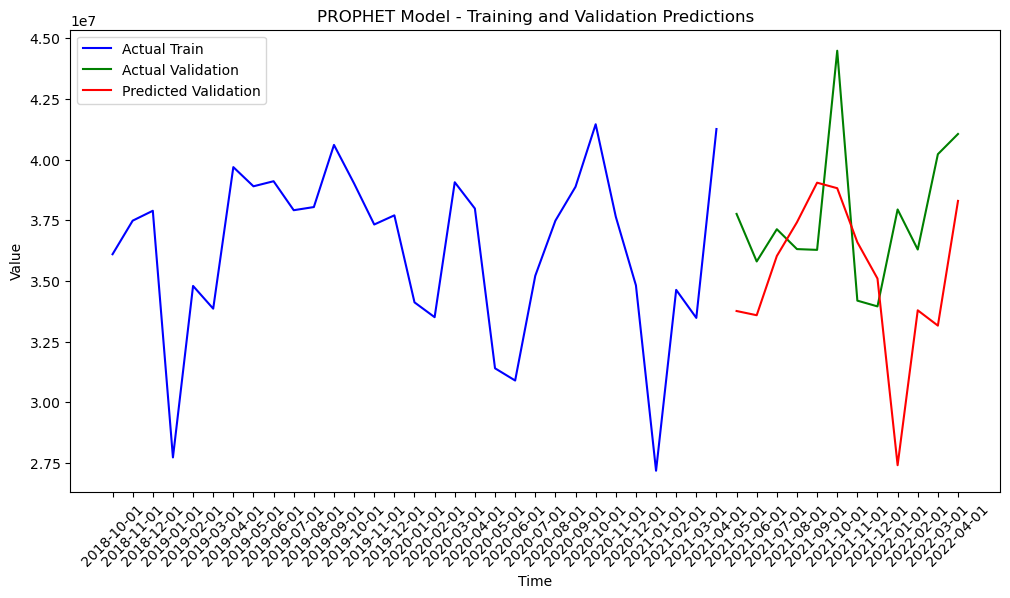

17:27:21 - cmdstanpy - INFO - Chain [1] start processing


Results appended to ./modelling_csvs/1_results.csv

 Training model for Product Category 14


17:27:21 - cmdstanpy - INFO - Chain [1] done processing


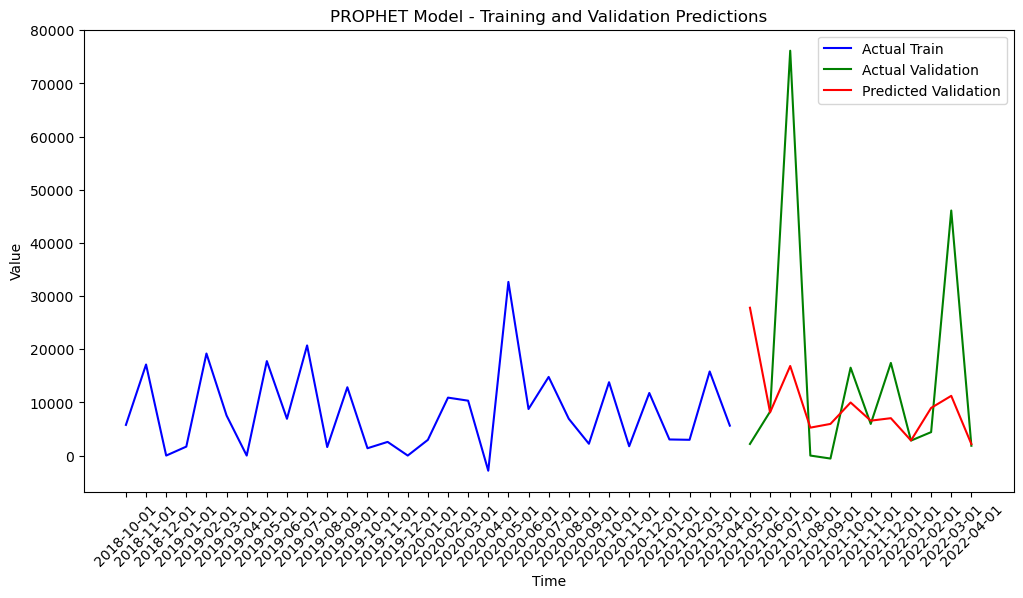

Results appended to ./modelling_csvs/14_results.csv


In [14]:
# Empty dicts
model_fits_p = {}
val_preds_p = {}

# ARIMA for all Product Categ
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Fit the ARIMA model using fs.stats_models method
    model_fits_p[target_number], val_preds_p[target_number] = fs.stats_models(
        'prophet', X_train_scaled, X_val_scaled, 
        target_train, target_val,
        plot=True,
        csv_path=f'./modelling_csvs/{target_number}_results.csv'
    )

In [17]:
#model_fit_prof, val_preds_prof = fs.stats_models('prophet', X_train, X_val, 
#                                 y_train_1, y_val_1, order=(1,1,3),
#                                 plot = True, 
#                                 csv_path = './modelling_csvs/test3.csv')

**Example for prediction on test data**

In [27]:
future_dates = pd.date_range(start='2022-04-01', periods=10, freq='M')
future_df = pd.DataFrame({'ds': future_dates})

future_preds = model_fits_p['1'].predict(future_df) 
print(future_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


          ds        yhat  yhat_lower  yhat_upper
0 2022-04-30 44230037.57 38236430.29 50195221.98
1 2022-05-31 44817559.25 38262593.71 51113067.81
2 2022-06-30 39046571.73 32798011.67 45652346.06
3 2022-07-31 39269534.84 33088050.45 45441356.87
4 2022-08-31 44791293.36 39279468.81 51409805.39
5 2022-09-30 39676180.20 33917216.39 45325386.93
6 2022-10-31 23836799.98 18054527.25 29183484.47
7 2022-11-30 49328602.69 43511678.07 55862069.39
8 2022-12-31 44519513.59 37965481.63 50569606.66
9 2023-01-31 36230834.58 30094027.74 42662814.91


### ML Models

#### Lazy Regressor

In [31]:
"""# Empty Dicts
lazy_model = {}
lazy_pred = {}

for target_name, selected_features in features.items():
    
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    X_train_target = X_train_scaled[selected_features]
    X_val_target = X_val_scaled[selected_features]

    
    # Fit 
    lazy_model[target_number], lazy_pred[target_number] = fs.lazy_regressor(
        X_train_target, X_val_target, 
        target_train, target_val, 
        plot=False, 
        csv_path=f'./modelling_csvs/{target_number}_results.csv')"""

'# Empty Dicts\nlazy_model = {}\nlazy_pred = {}\n\nfor target_name, selected_features in features.items():\n\n    target_train = globals().get(f\'y_train_{target_name.split("_")[-1]}\')\n    target_val = globals().get(f\'y_val_{target_name.split("_")[-1]}\')\n\n    target_number = target_name.split(\'_\')[-1]\n\n    X_train_target = X_train_scaled[selected_features]\n    X_val_target = X_val_scaled[selected_features]\n\n\n    # Fit \n    lazy_model[target_number], lazy_pred[target_number] = fs.lazy_regressor(\n        X_train_target, X_val_target, \n        target_train, target_val, \n        plot=False, \n        csv_path=f\'./modelling_csvs/{target_number}_results.csv\')'

In [26]:
# Using ChatGPT help to try to find the error

lazy_model = {}
lazy_pred = {}

# Iterate over fs_mm_xgb and process each target variable
for target_name, selected_features in features.items():
    try:
        # Extract the corresponding target train and validation data
        target_number = target_name.split('_')[-1]
        
        # Instead of using globals, directly get target_train and target_val
        target_train = globals().get(f'y_train_{target_number}')
        target_val = globals().get(f'y_val_{target_number}')
        
        if target_train is None or target_val is None:
            print(f"Warning: Target data for {target_name} is missing.")
            continue  # Skip to the next target variable if data is missing
        
        # Extract the selected features
        X_train_target = X_train_scaled[selected_features]
        X_val_target = X_val_scaled[selected_features]
        
        # Check if the selected features are valid (no missing columns)
        missing_columns = [col for col in selected_features if col not in X_train_scaled.columns]
        if missing_columns:
            print(f"Warning: Missing columns in selected features for {target_name}: {missing_columns}")
            continue
        
        # Fit LazyRegressor and store results in the dictionaries
        print(f"Fitting LazyRegressor for target {target_name}...")
        lazy_model[target_number], lazy_pred[target_number] = fs.lazy_regressor(
            X_train_target, X_val_target, 
            target_train, target_val, 
            plot=False, 
            csv_path=f'./modelling_csvs/{target_number}_results.csv'
        )
        
        # Instead of checking 'empty', check if a model was trained
        if lazy_model[target_number] is None or isinstance(lazy_model[target_number], Pipeline) and not hasattr(lazy_model[target_number], 'steps'):
            print(f"Warning: No valid model trained for {target_name}.")
            continue

    except Exception as e:
        # Catch and report any errors during the process
        print(f"Error processing {target_name}: {e}")

# For some reason when processing #1 inside the loop we receive an error: attempt to get argmin of an empty sequence
# However, when using the same function for the same #1 outside a loop (bellow) everything works fine

Fitting LazyRegressor for target y_train_36...


100%|███████████████████████| 42/42 [00:01<00:00, 40.29it/s]


Results appended to ./modelling_csvs/36_results.csv
Error processing y_train_36: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_8...


100%|███████████████████████| 42/42 [00:01<00:00, 39.95it/s]


Results appended to ./modelling_csvs/8_results.csv
Error processing y_train_8: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_20...


100%|███████████████████████| 42/42 [00:01<00:00, 40.98it/s]


Results appended to ./modelling_csvs/20_results.csv
Error processing y_train_20: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_9...


100%|███████████████████████| 42/42 [00:01<00:00, 40.42it/s]


Results appended to ./modelling_csvs/9_results.csv
Error processing y_train_9: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_4...


100%|███████████████████████| 42/42 [00:01<00:00, 40.92it/s]


Results appended to ./modelling_csvs/4_results.csv
Error processing y_train_4: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_11...


100%|███████████████████████| 42/42 [00:01<00:00, 36.50it/s]


Results appended to ./modelling_csvs/11_results.csv
Error processing y_train_11: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_5...


100%|███████████████████████| 42/42 [00:01<00:00, 39.60it/s]


Results appended to ./modelling_csvs/5_results.csv
Error processing y_train_5: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_12...


100%|███████████████████████| 42/42 [00:01<00:00, 29.74it/s]


Results appended to ./modelling_csvs/12_results.csv
Error processing y_train_12: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_13...


100%|███████████████████████| 42/42 [00:01<00:00, 38.00it/s]


Results appended to ./modelling_csvs/13_results.csv
Error processing y_train_13: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_6...


100%|███████████████████████| 42/42 [00:01<00:00, 35.72it/s]


Results appended to ./modelling_csvs/6_results.csv
Error processing y_train_6: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_16...


100%|███████████████████████| 42/42 [00:01<00:00, 35.07it/s]


Results appended to ./modelling_csvs/16_results.csv
Error processing y_train_16: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_3...


100%|███████████████████████| 42/42 [00:01<00:00, 39.94it/s]


Error processing y_train_3: attempt to get argmin of an empty sequence
Fitting LazyRegressor for target y_train_1...


100%|███████████████████████| 42/42 [00:01<00:00, 35.19it/s]


Results appended to ./modelling_csvs/1_results.csv
Error processing y_train_1: name 'Pipeline' is not defined
Fitting LazyRegressor for target y_train_14...


100%|███████████████████████| 42/42 [00:01<00:00, 37.94it/s]

Results appended to ./modelling_csvs/14_results.csv
Error processing y_train_14: name 'Pipeline' is not defined


100%|███████████████████████| 42/42 [00:01<00:00, 39.32it/s]


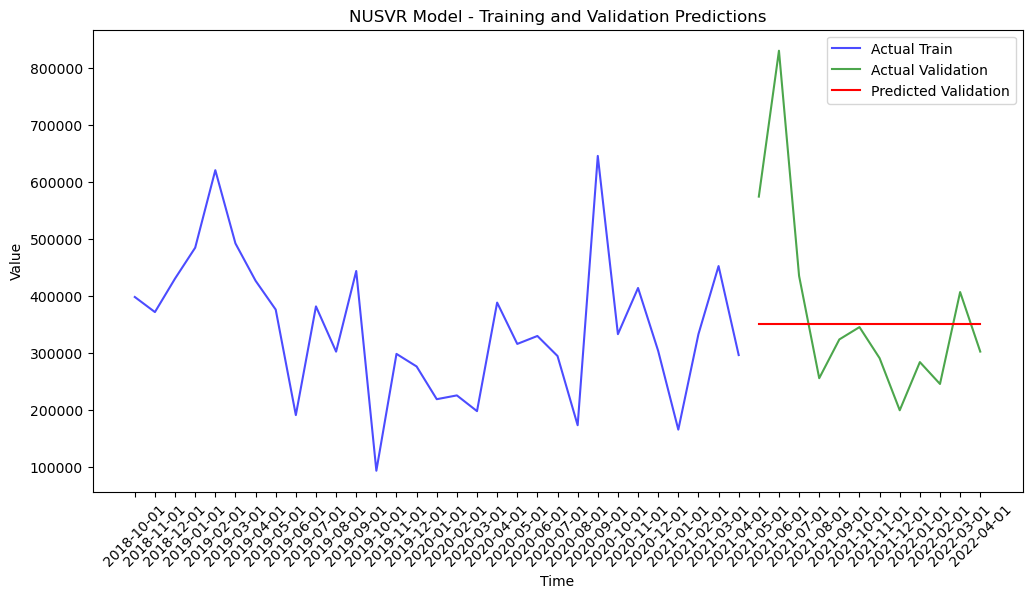

Results appended to ./modelling_csvs/1_results.csv


In [30]:
feat = features['y_train_1']

lazy_model['1'], lazy_pred['1'] = fs.lazy_regressor(X_train_scaled[feat], X_val_scaled[feat], 
               y_train_4, 
               y_val_4, plot = True, 
               csv_path = './modelling_csvs/1_results.csv')

#### XGBoost


 Training model for Product Category 36


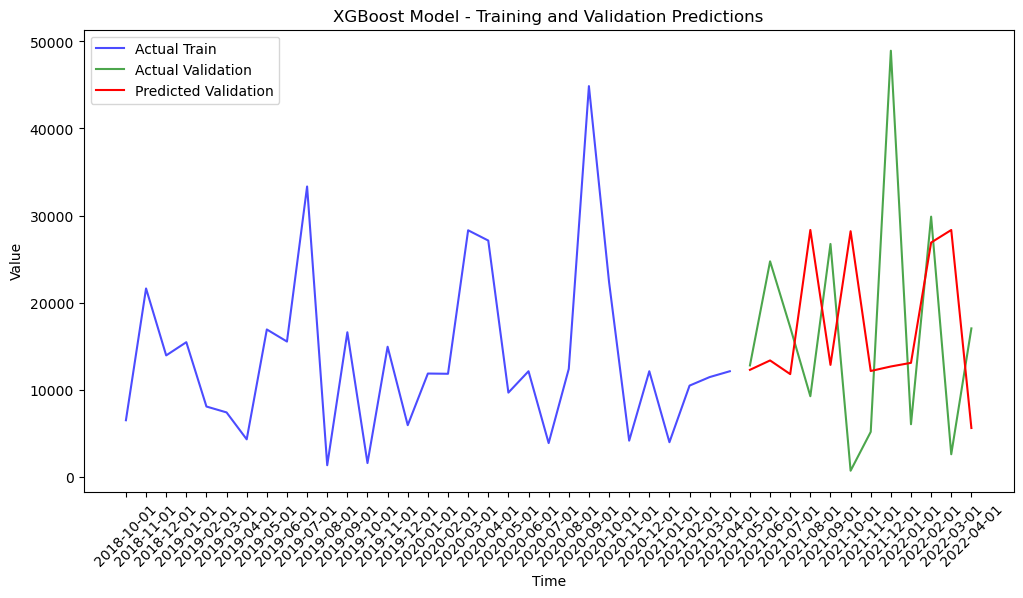

Results appended to ./modelling_csvs/36_results.csv

 Training model for Product Category 8


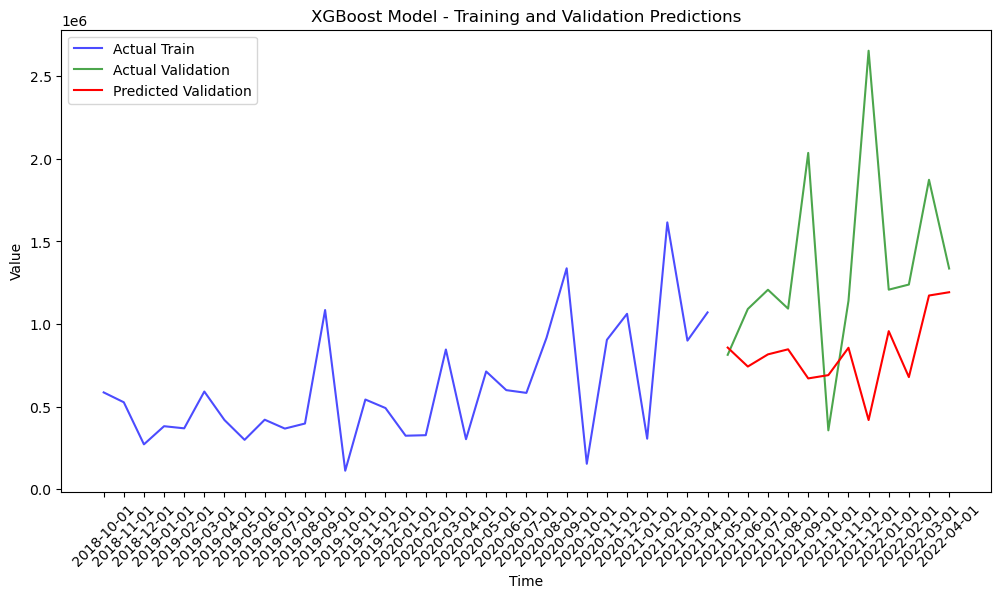

Results appended to ./modelling_csvs/8_results.csv

 Training model for Product Category 20


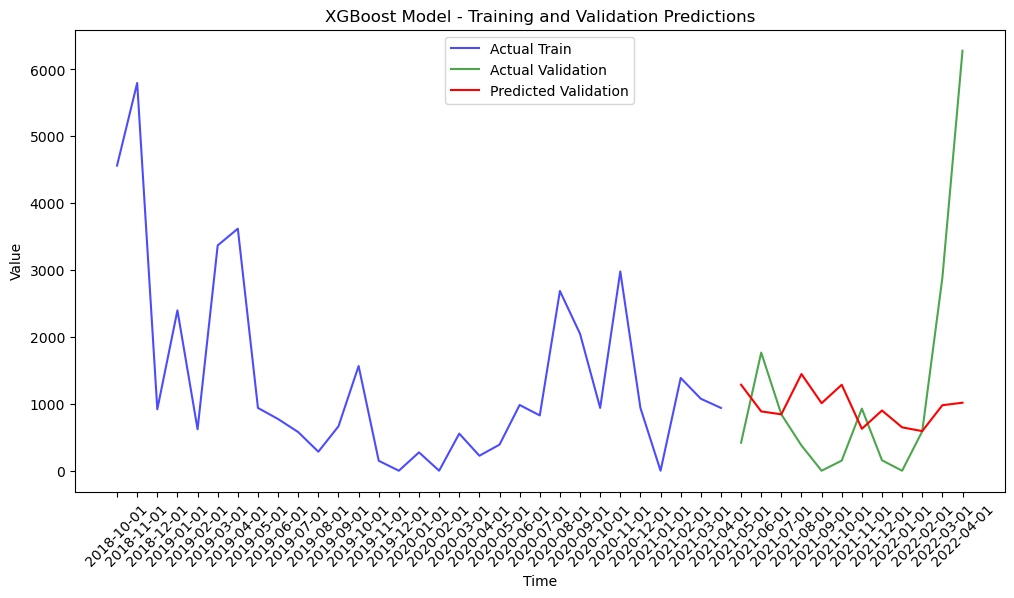

Results appended to ./modelling_csvs/20_results.csv

 Training model for Product Category 9


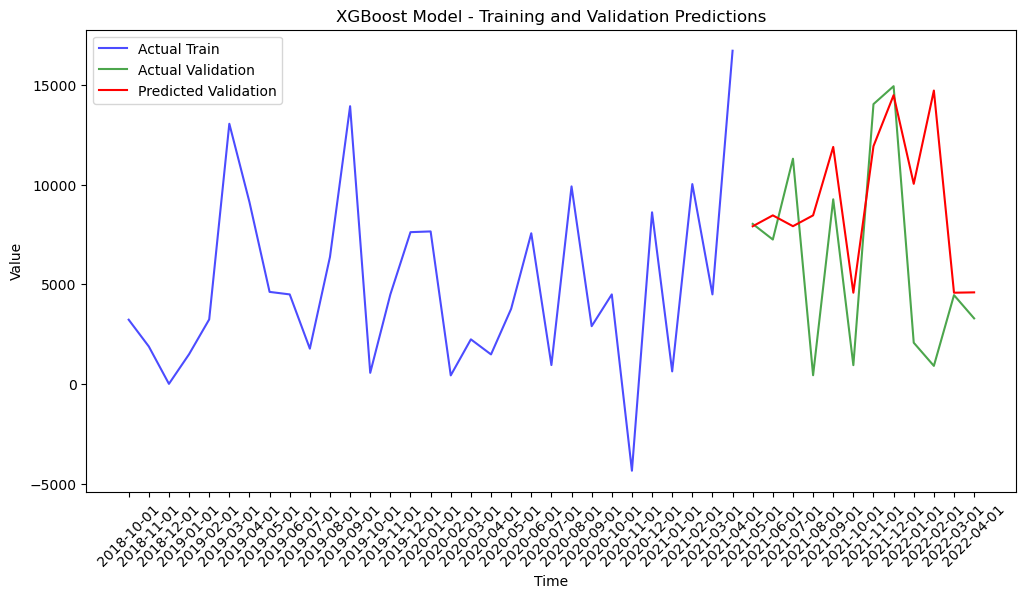

Results appended to ./modelling_csvs/9_results.csv

 Training model for Product Category 4


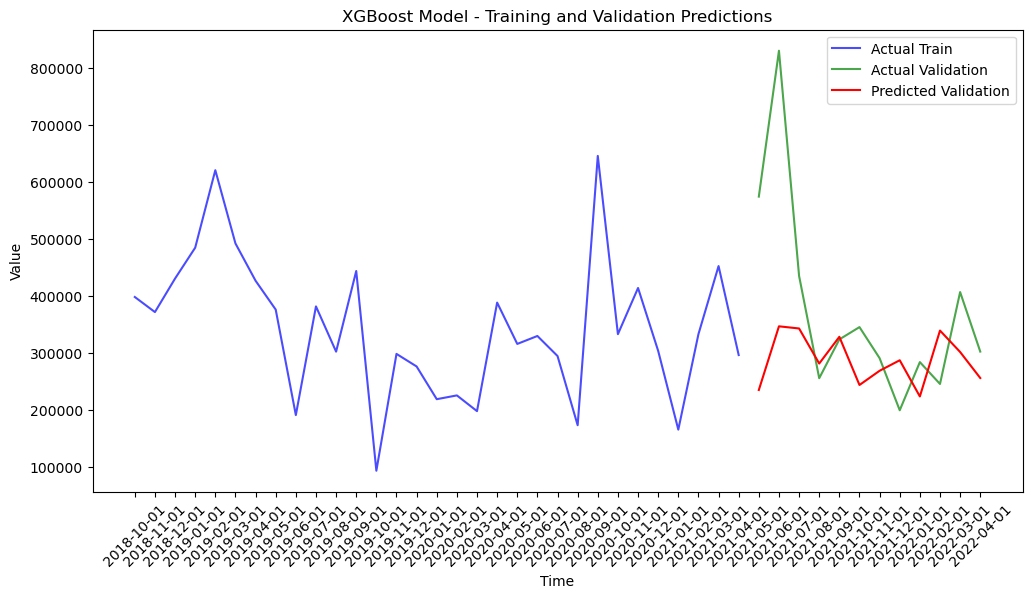

Results appended to ./modelling_csvs/4_results.csv

 Training model for Product Category 11


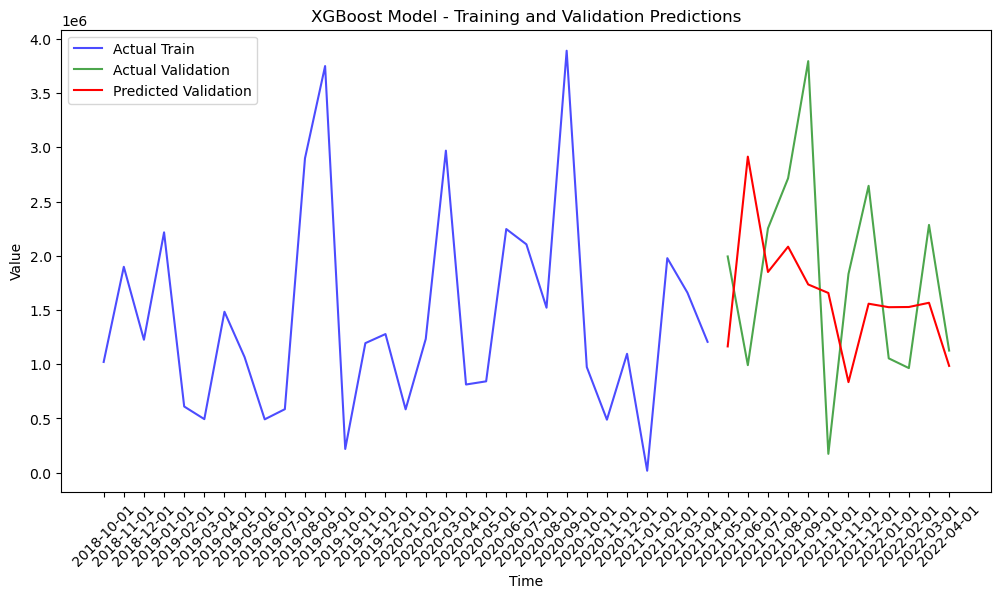

Results appended to ./modelling_csvs/11_results.csv

 Training model for Product Category 5


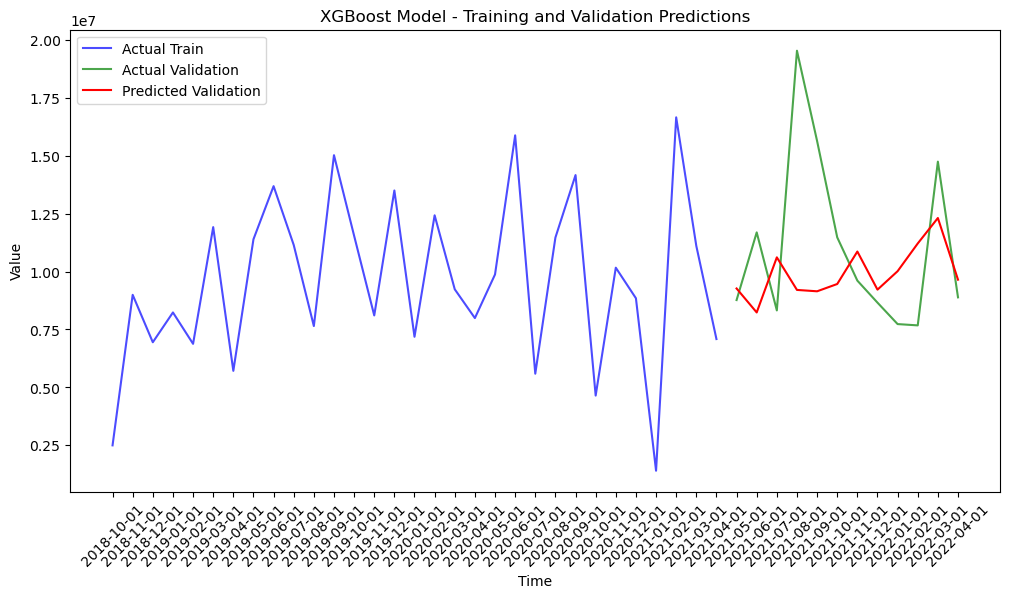

Results appended to ./modelling_csvs/5_results.csv

 Training model for Product Category 12


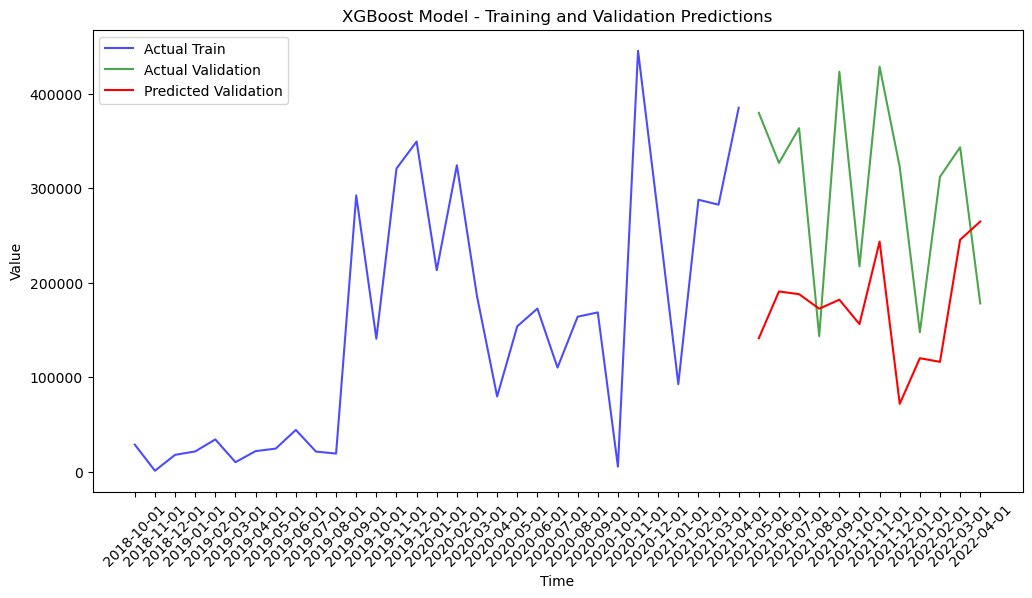

Results appended to ./modelling_csvs/12_results.csv

 Training model for Product Category 13


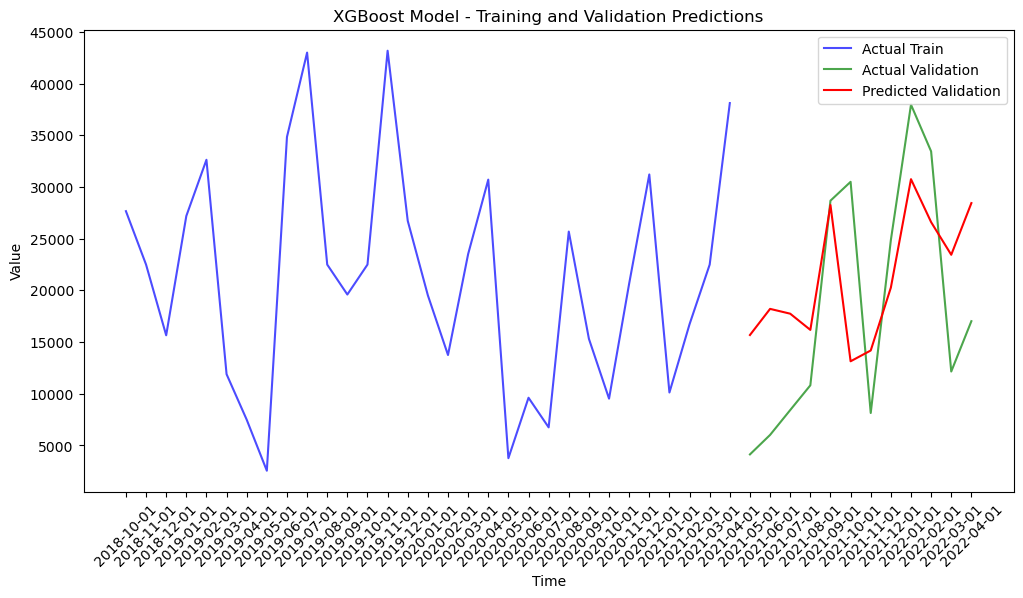

Results appended to ./modelling_csvs/13_results.csv

 Training model for Product Category 6


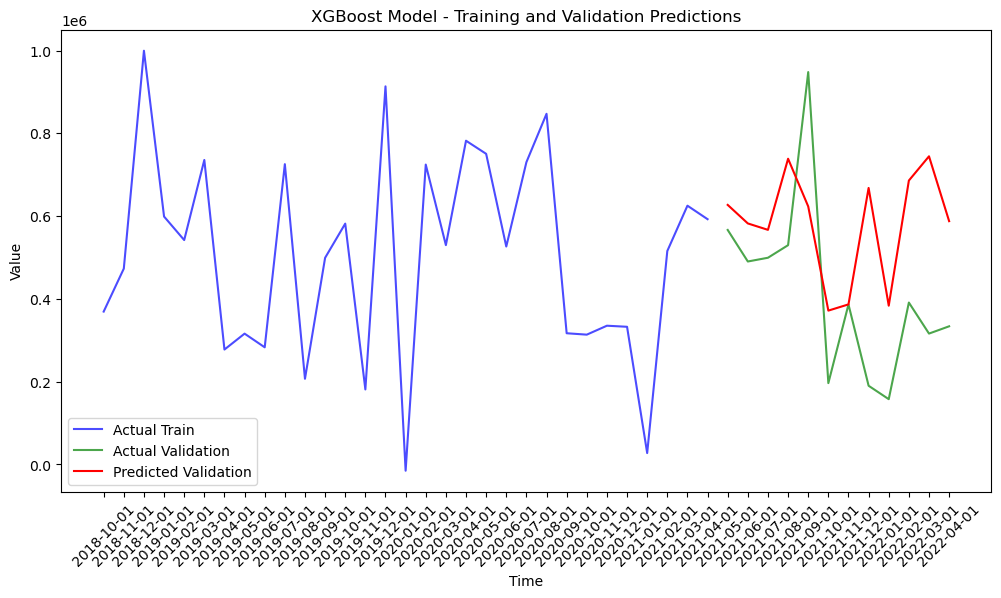

Results appended to ./modelling_csvs/6_results.csv

 Training model for Product Category 16


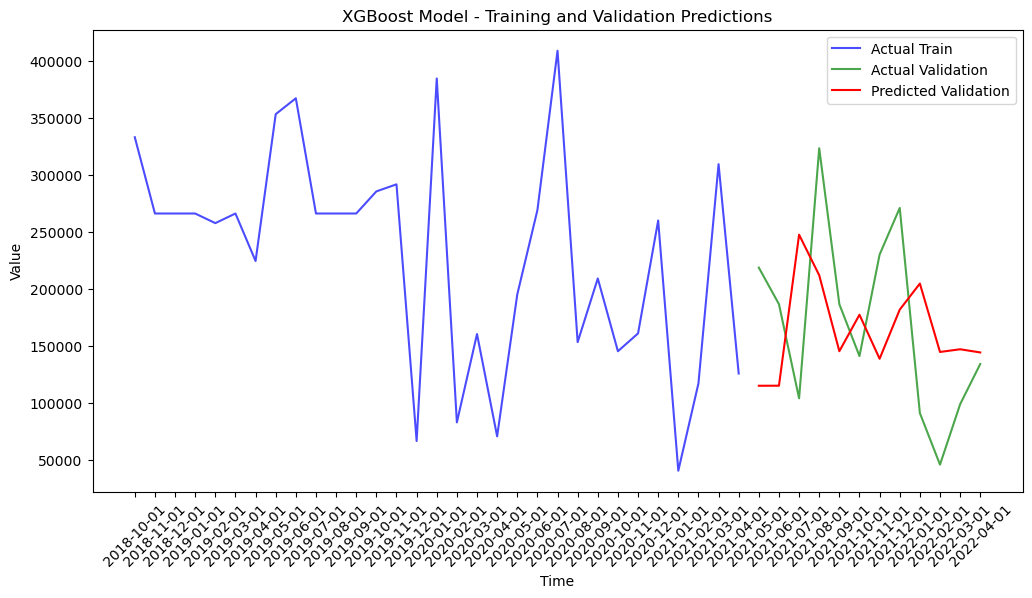

Results appended to ./modelling_csvs/16_results.csv

 Training model for Product Category 3


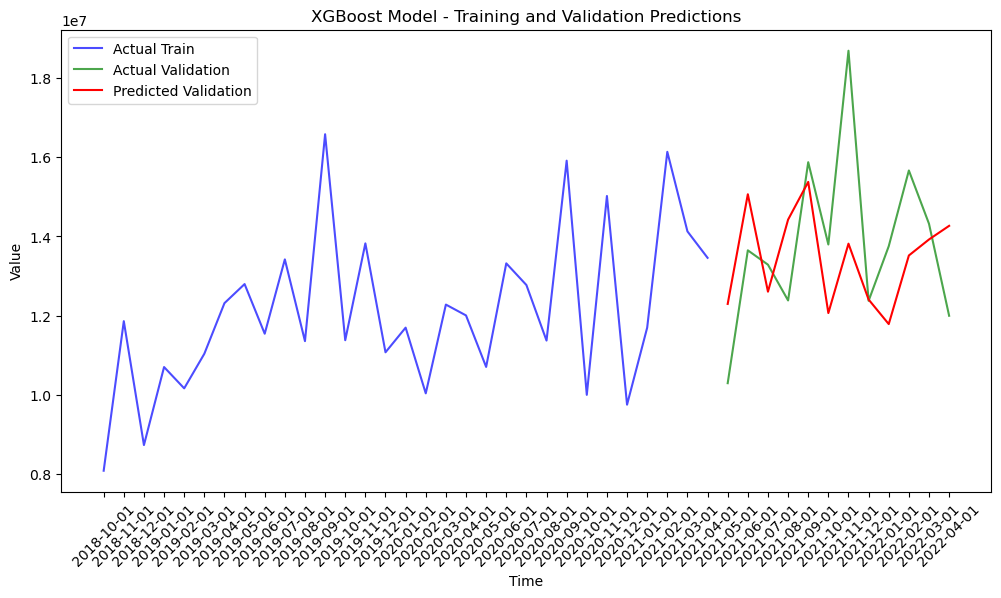

Results appended to ./modelling_csvs/3_results.csv

 Training model for Product Category 1


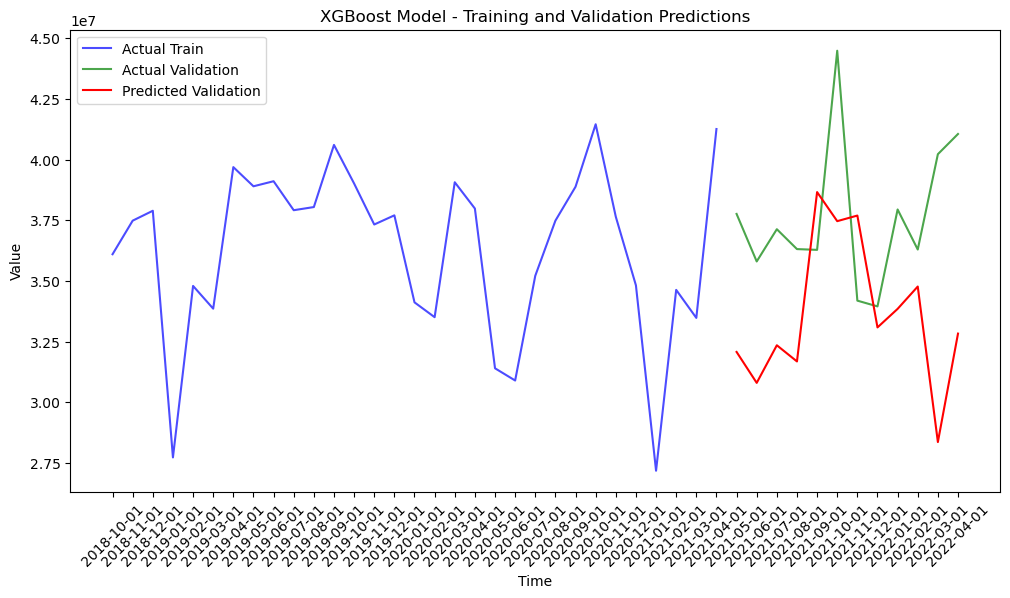

Results appended to ./modelling_csvs/1_results.csv

 Training model for Product Category 14


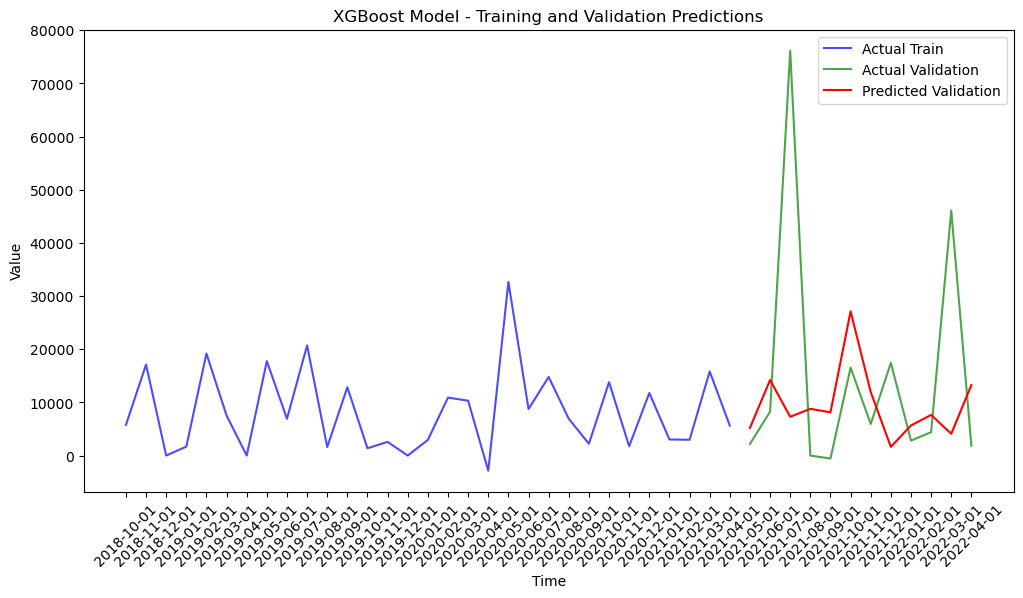

Results appended to ./modelling_csvs/14_results.csv


In [15]:
model_fits_xgb = {}
val_preds_xgb = {}

# XGBoost for all Product Categories
for target_name, selected_features in features.items():
    target_train = globals().get(f'y_train_{target_name.split("_")[-1]}')
    target_val = globals().get(f'y_val_{target_name.split("_")[-1]}')

    target_number = target_name.split('_')[-1]

    print(f'\n Training model for Product Category {target_number}')

    # Only selected features
    X_train_target = X_train_scaled[selected_features] 
    X_val_target = X_val_scaled[selected_features] 

    # Fit the XGBoost model
    model_fits_xgb[target_number], val_preds_xgb[target_number] = fs.xgboost_regressor(
        X_train_target, X_val_target, 
        target_train, target_val,
        plot=True,
        csv_path=f'./modelling_csvs/{target_number}_results.csv'
    )

# 4. Results Comparison

In [22]:
folder_path = './modelling_csvs' 


csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Names
file_names = [os.path.basename(file) for file in csv_files]

dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]


In [23]:
file_names

['4_results.csv',
 '8_results.csv',
 '1_results.csv',
 '16_results.csv',
 '13_results.csv',
 '14_results.csv',
 '9_results.csv',
 '36_results.csv',
 '5_results.csv',
 '11_results.csv',
 '12_results.csv',
 '20_results.csv',
 '6_results.csv',
 '3_results.csv']

4_results.csv


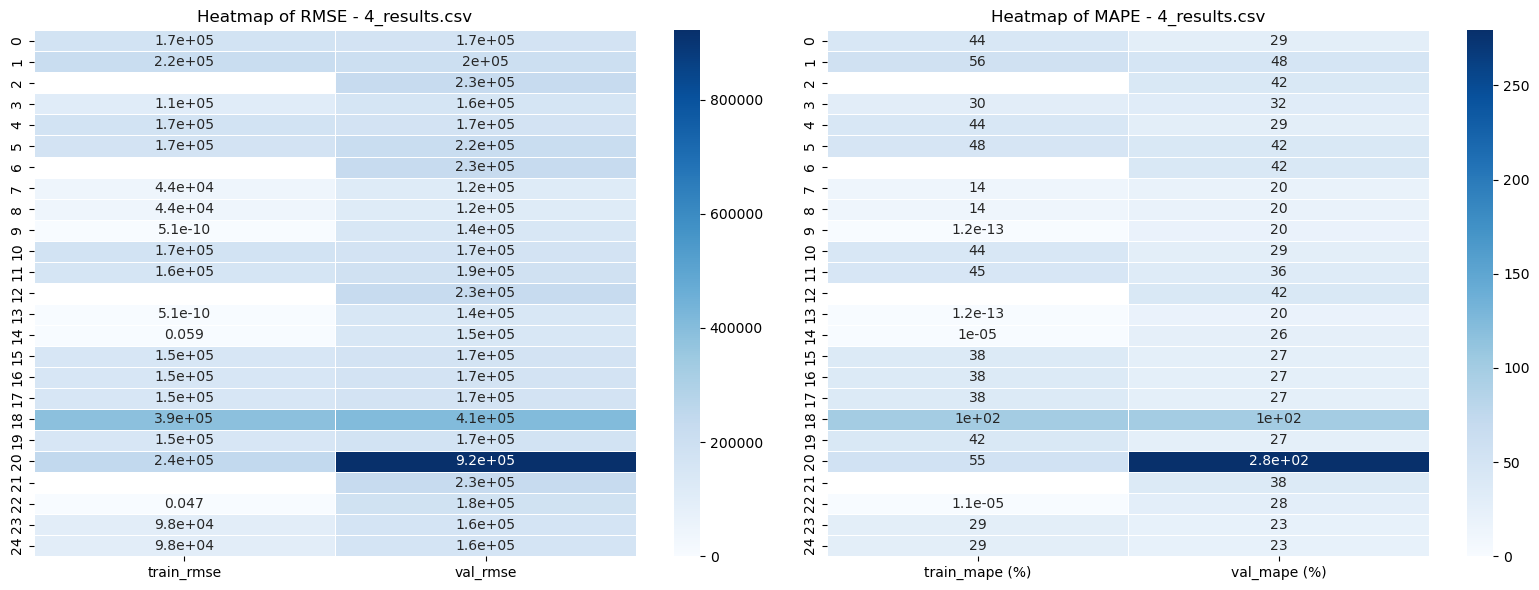

8_results.csv


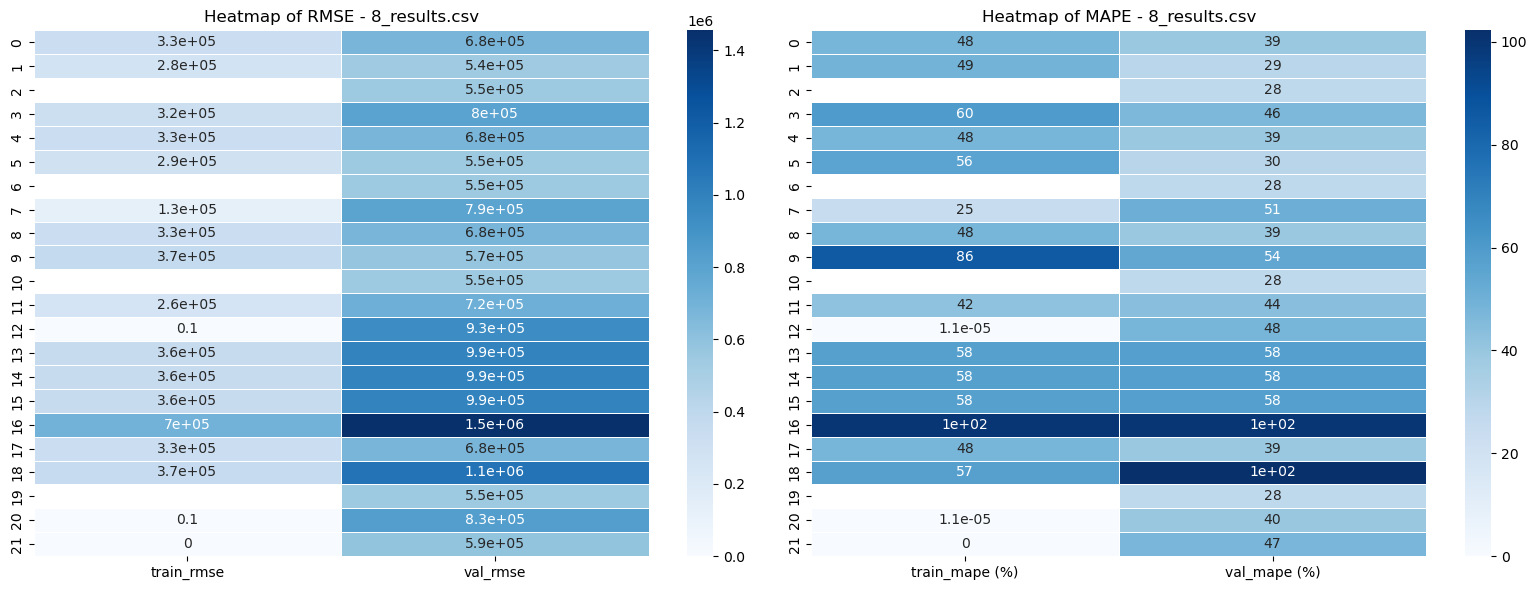

1_results.csv


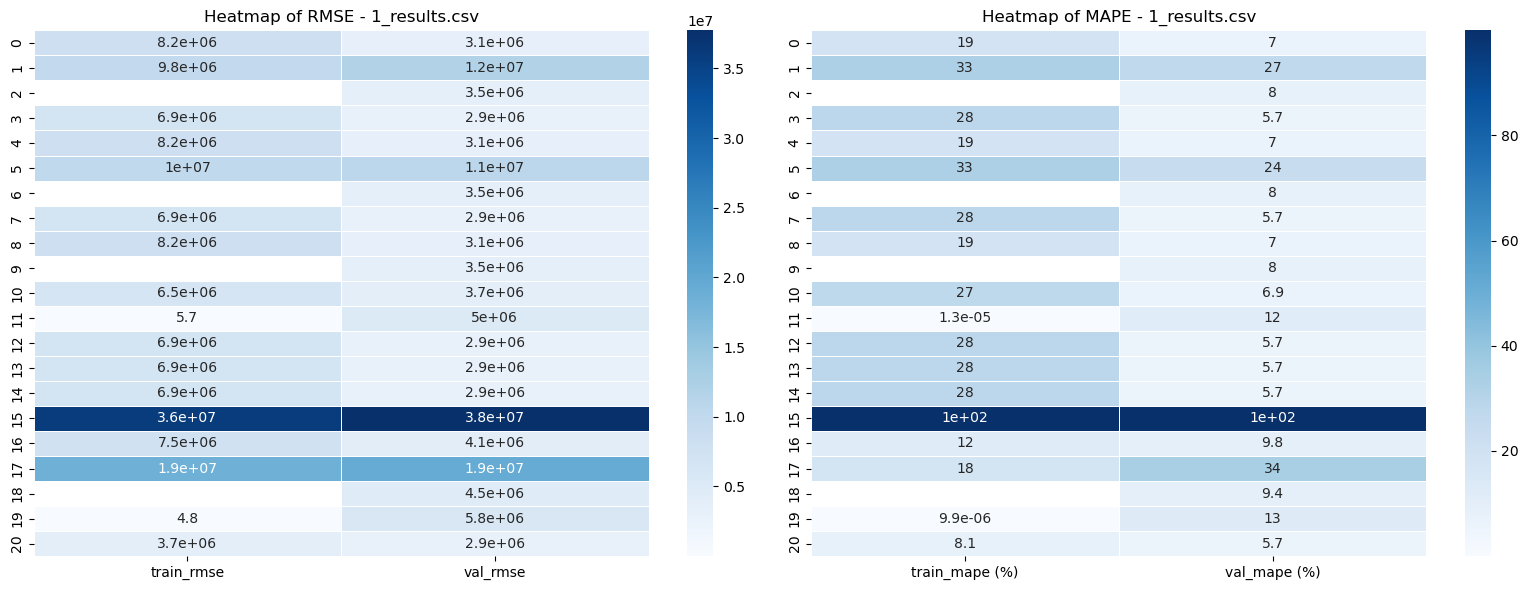

16_results.csv


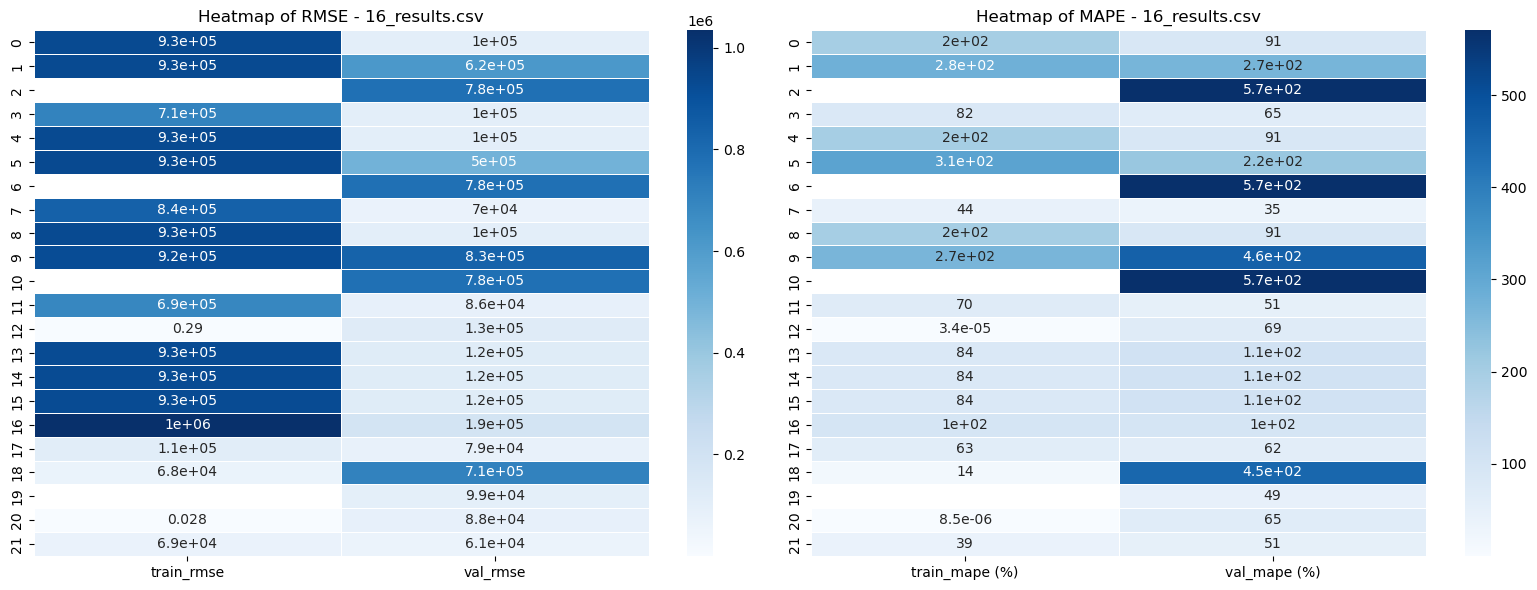

13_results.csv


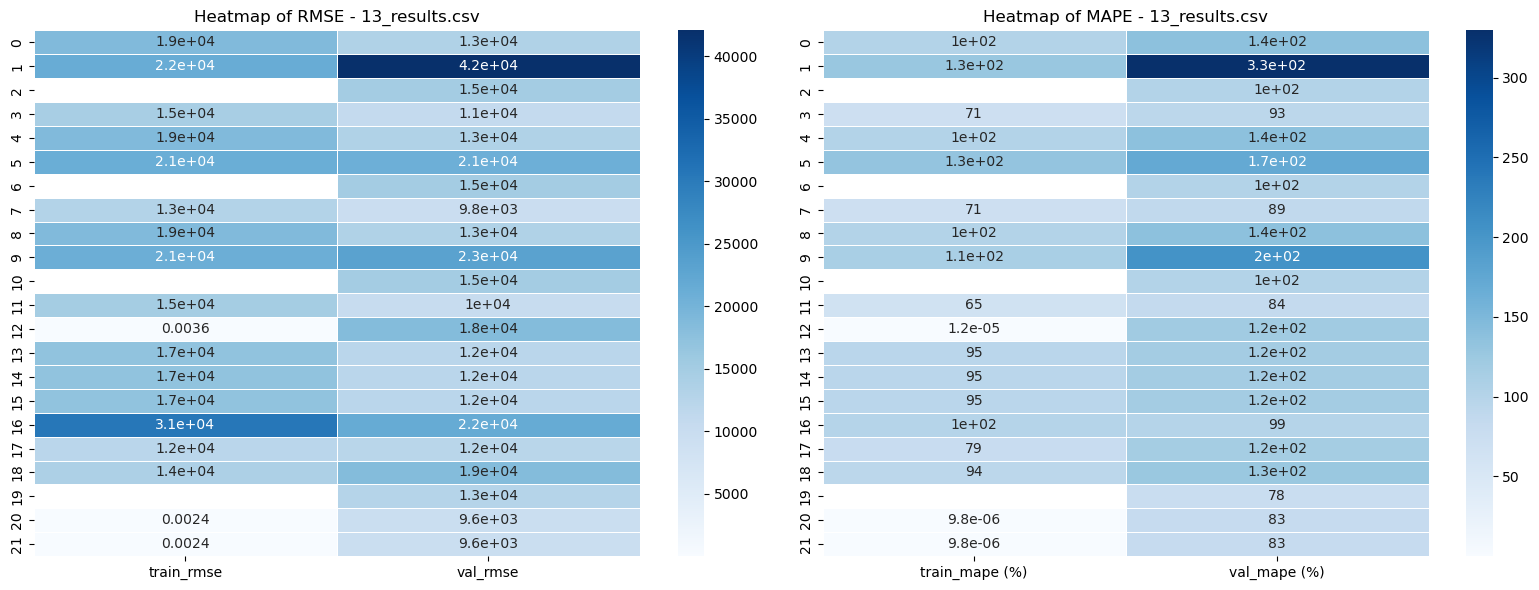

14_results.csv


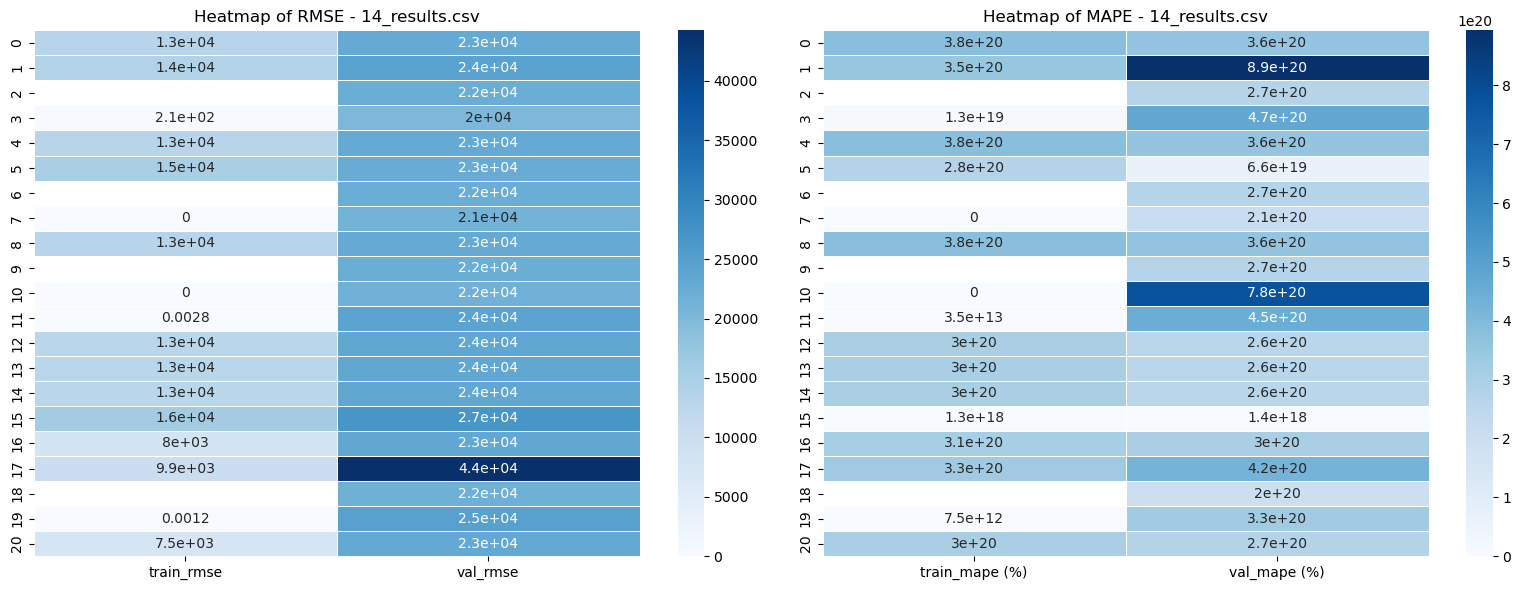

9_results.csv


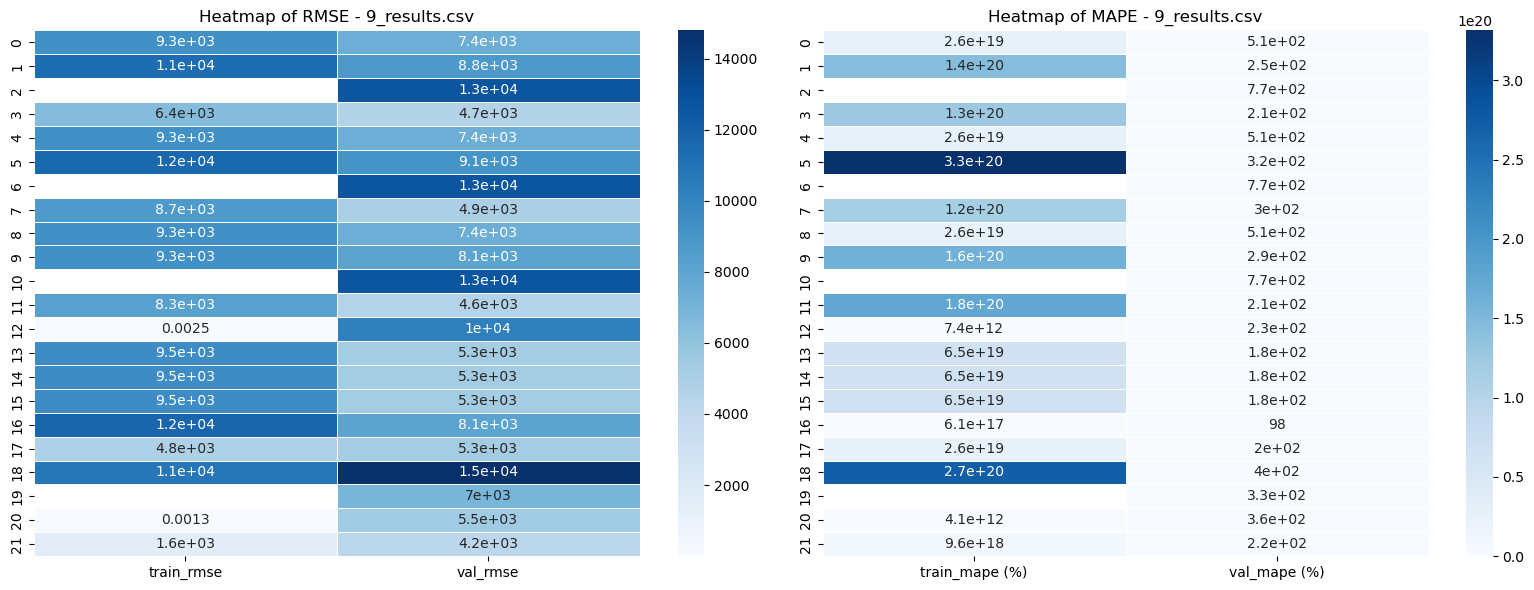

36_results.csv


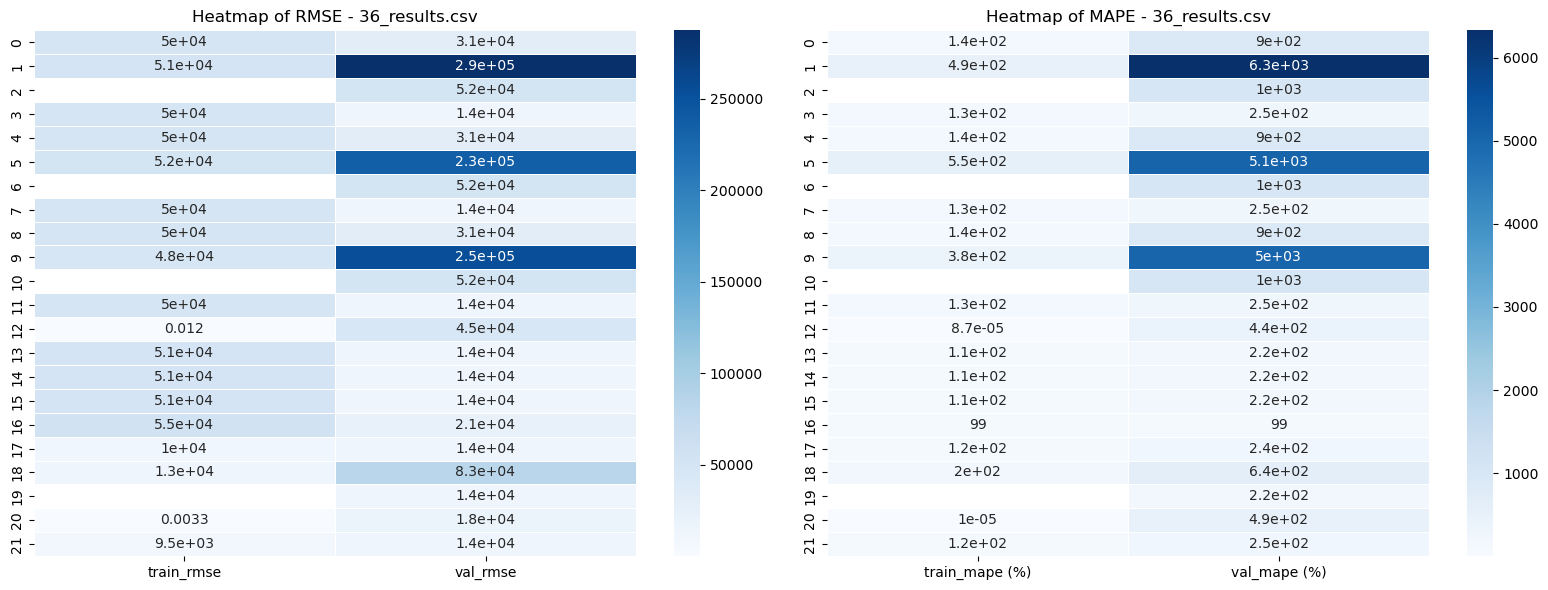

5_results.csv


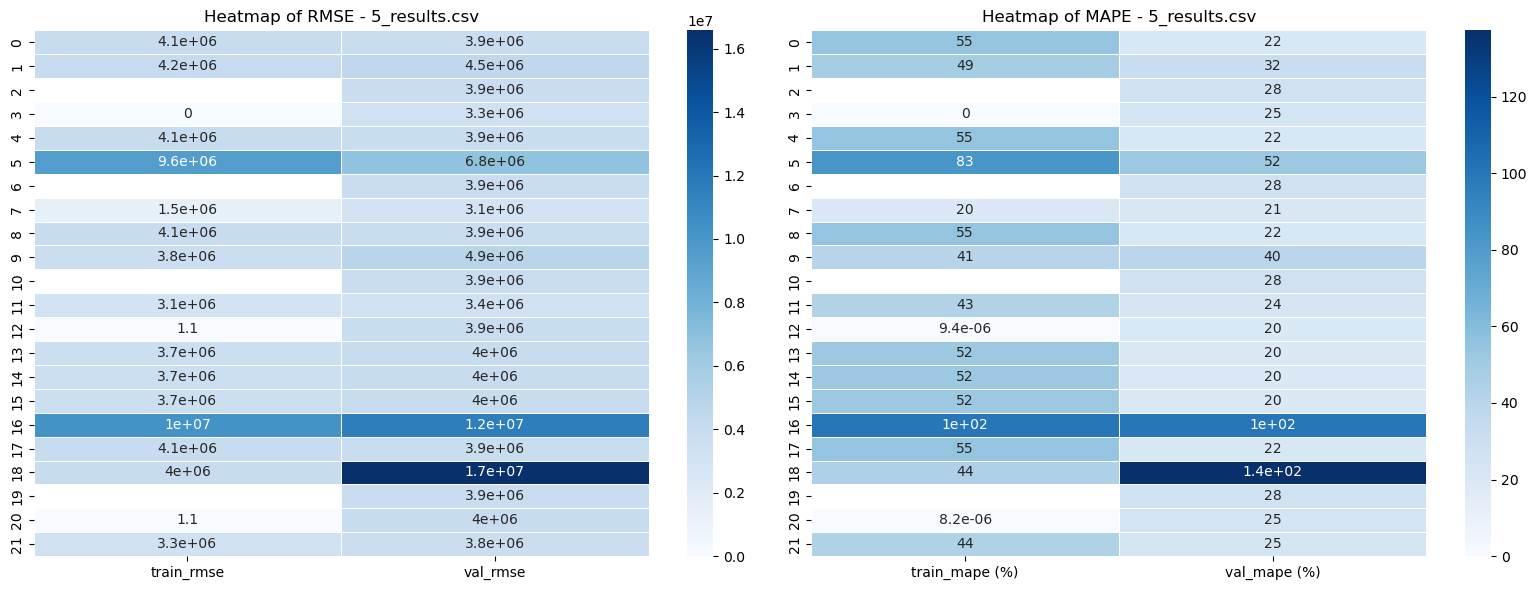

11_results.csv


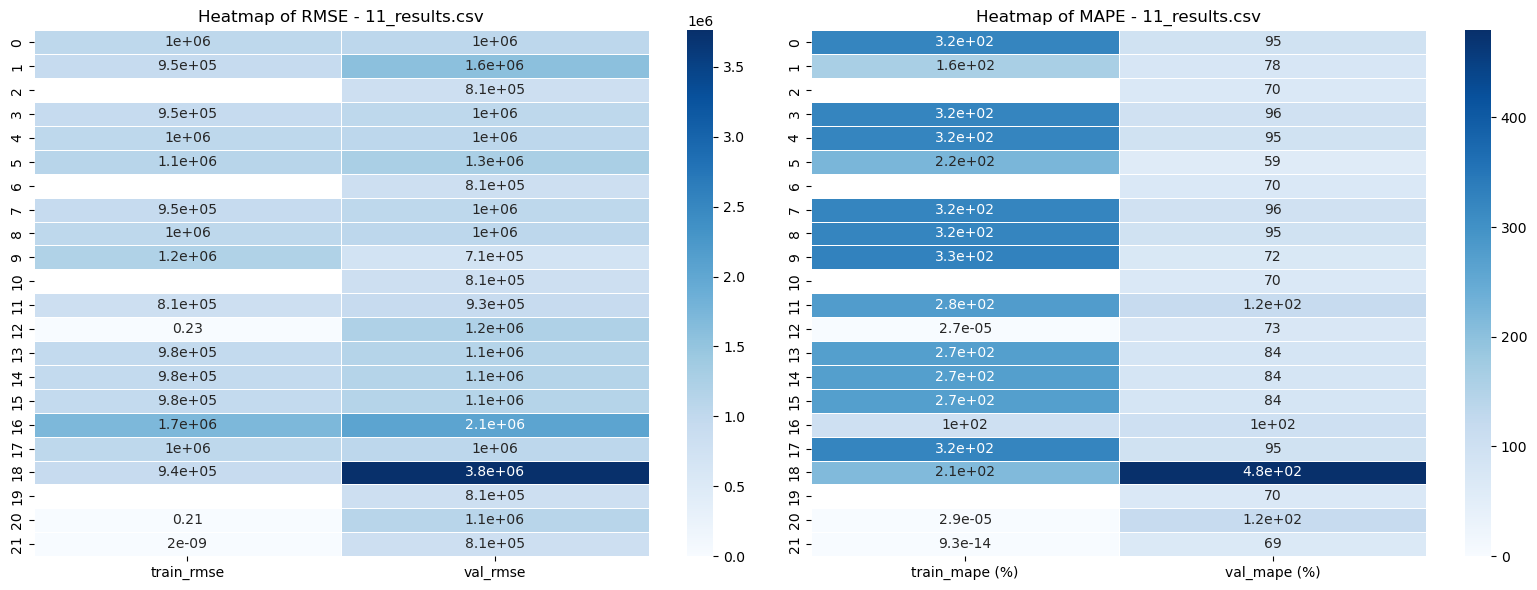

12_results.csv


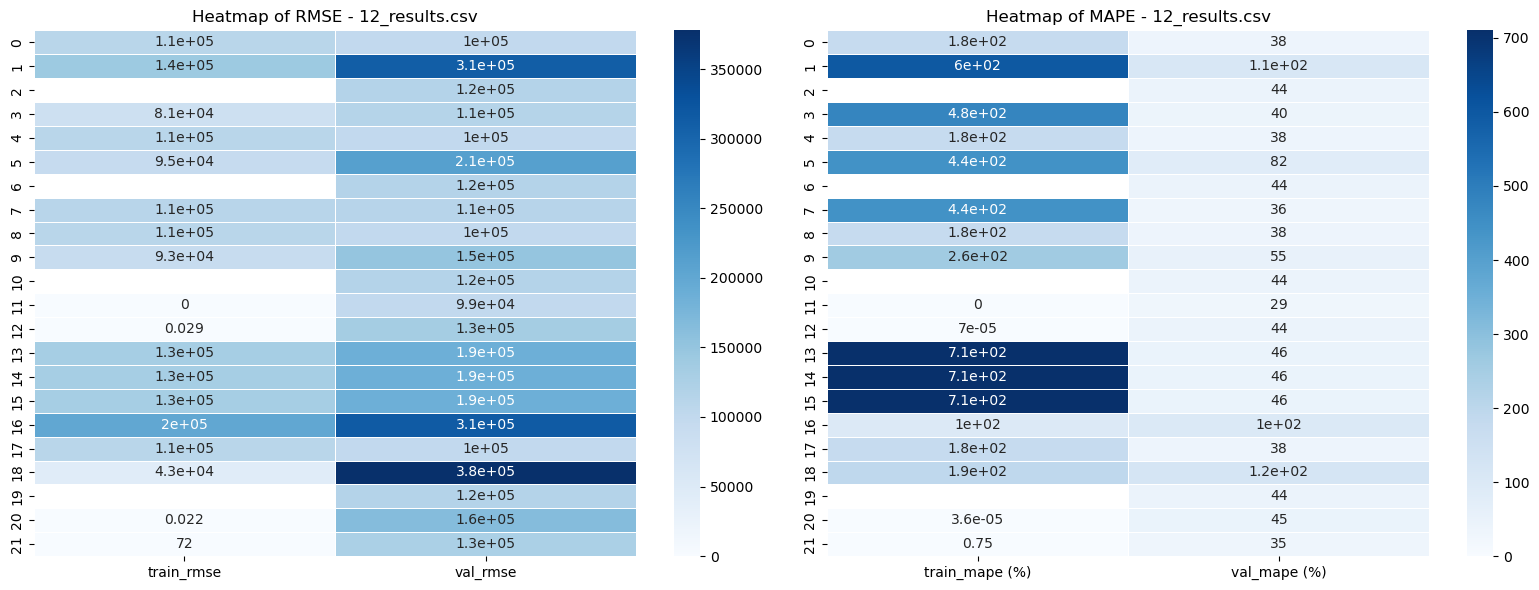

20_results.csv


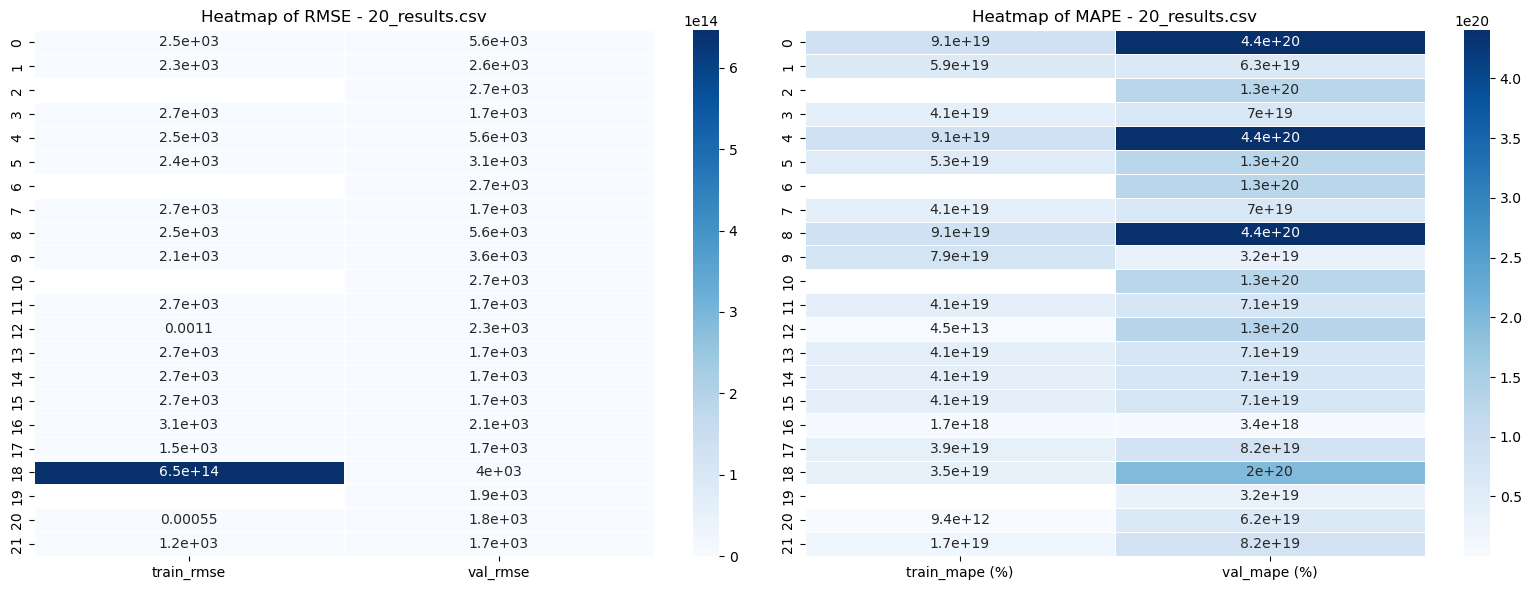

6_results.csv


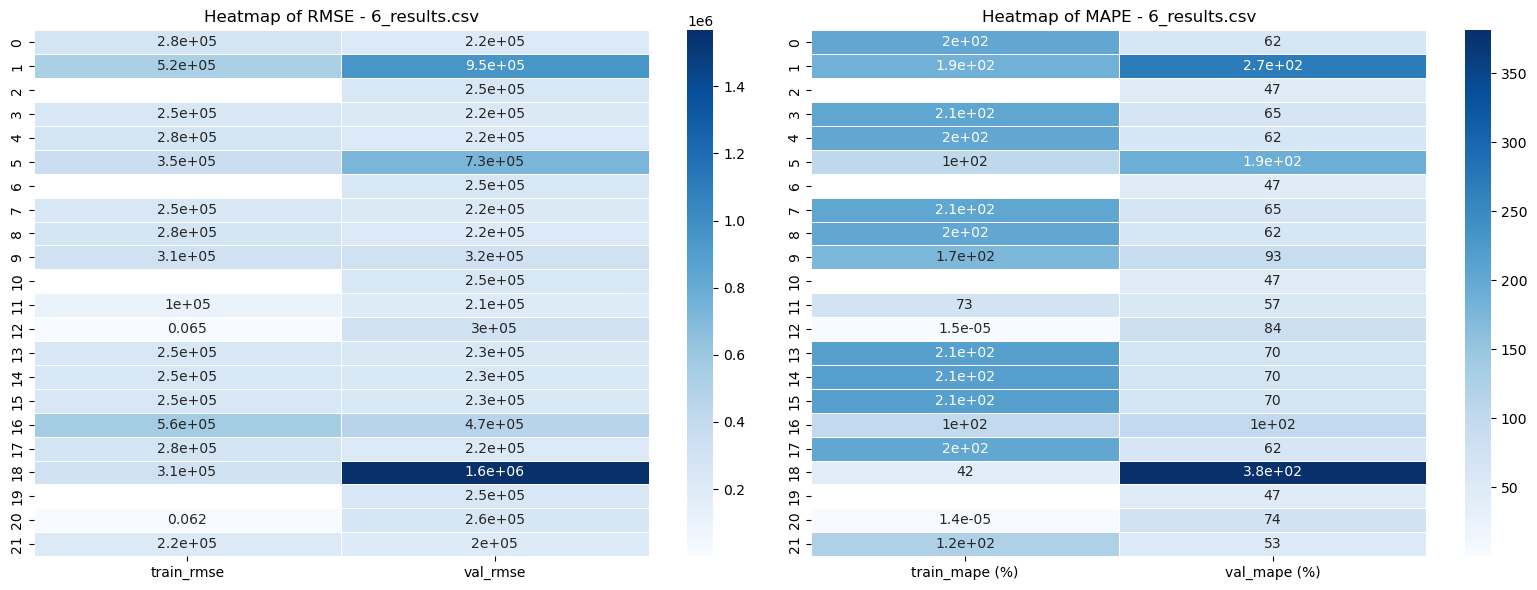

3_results.csv


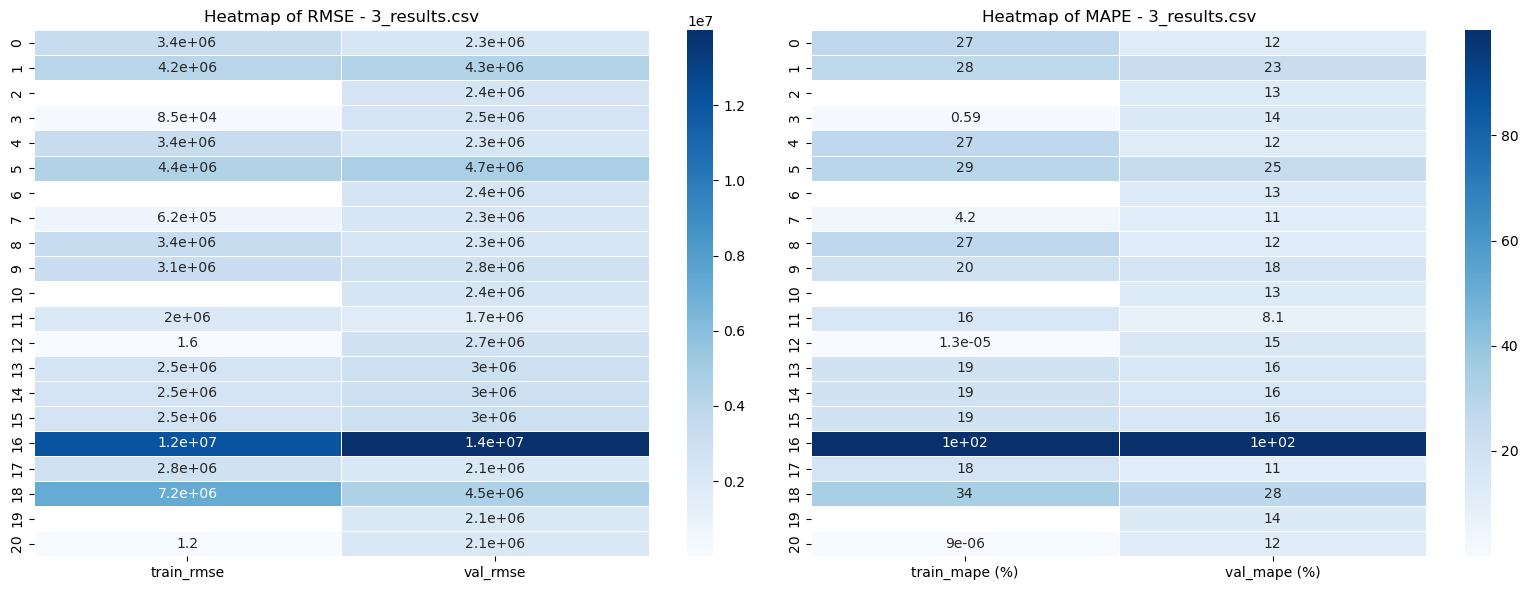

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

for file_name, df in zip(file_names, dataframes):
    # Select numeric columns only
    numeric_df = df.select_dtypes(include='number')

    # Check if there are at least 4 numeric columns
    if numeric_df.shape[1] >= 4:
        # Split the numeric columns into two parts: first 2 and second 2 columns
        first_two_cols = numeric_df.iloc[:, :2]
        second_two_cols = numeric_df.iloc[:, 2:4]

        print(file_name) 
        
        # Create subplots (1 row, 2 columns)
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

        # Plot the first heatmap in the first subplot
        sns.heatmap(first_two_cols, annot=True, cmap='Blues', linewidths=0.5, ax=axes[0])
        axes[0].set_title(f"Heatmap of RMSE - {file_name}")

        # Plot the second heatmap in the second subplot
        sns.heatmap(second_two_cols, annot=True, cmap='Blues', linewidths=0.5, ax=axes[1])
        axes[1].set_title(f"Heatmap of MAPE - {file_name}")

        plt.tight_layout()
        plt.show()

In [48]:
for df in dataframes:
    # Select numeric columns only
    numeric_df = df.select_dtypes(include='number')
    
    # Find the minimum values for each numeric column
    min_values = numeric_df.min()
    
    # For each column, show the row where the minimum value occurs
    for column in min_values.index:
        min_value = min_values[column]
        min_row = df[df[column] == min_value]
        
        # Display the result
        print(f"DataFrame: {df.shape}")
        print(f"Column: {column}")
        print(f"Minimum Value: {min_value}")
        print("Row with Minimum Value:")
        print(min_row)
        print("-" * 50)

DataFrame: (15, 6)
Column: train_rmse
Minimum Value: 5.126390570338077e-10
Row with Minimum Value:
             model_type                                      features_used  \
9   ExtraTreesRegressor  ['#16_Lag_1', '#13_Lag_3', '#12_Lag_12', '#12_...   
13  ExtraTreesRegressor  ['#16_Lag_1', '#13_Lag_3', '#12_Lag_12', '#12_...   

    train_rmse  val_rmse  train_mape (%)  val_mape (%)  
9         0.00 144562.46            0.00         19.54  
13        0.00 144562.46            0.00         19.54  
--------------------------------------------------
DataFrame: (15, 6)
Column: val_rmse
Minimum Value: 118778.21286027612
Row with Minimum Value:
         model_type                                      features_used  \
7  BaggingRegressor  ['#12_Lag_12', 'GER Production Index', '#12_Ro...   
8  BaggingRegressor  ['#12_Lag_12', 'GER Production Index', '#12_Ro...   

   train_rmse  val_rmse  train_mape (%)  val_mape (%)  
7    44310.47 118778.21           14.00         20.00  
8    44310.47 1

## OTHER

## Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Fit the model using the training data
model.fit(X_train_1_scaled, y_train_1)

# Make predictions on the validation set
y_pred_val_1 = model.predict(X_val_1_scaled)

# Calculate RMSE for the validation set
rmse_val_1 = np.sqrt(mean_squared_error(y_val_1, y_pred_val_1))
print(f'Root Mean Squared Error on Validation Set: {rmse_val_1}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(y_val_1.index, y_val_1, label='Actual Validation Values', linestyle='-', color='g')
plt.plot(y_val_1.index, y_pred_val_1, label='Predicted Validation Values', linestyle='--', color='g')

plt.plot(y_train_1.index, y_train_1, label='Actual Training Values', linestyle='-', color='b')

plt.xlabel('Date/Time')
plt.ylabel('Sales')
plt.title('XGBoost Forecasting: Actual vs Predicted (Training and Validation)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
